In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import evaluate as ev
import prepare as prep
import acquire as ac

In [26]:
a = ac.animals()

In [3]:
a.head()

,name,outcome_type,animal_type,color,age,gender,neut_spay,condition,breed1,breed2
0,False,Adoption,Dog,Brown/White,180,male,True,Normal,Other,purebred
1,True,Adoption,Dog,Tan,730,male,True,Normal,Pit Bull,mix
2,True,Adoption,Dog,Other,120,male,True,Normal,Labrador Retriever,purebred
3,False,Transfer,Cat,Brown Tabby/White,1095,unk,False,Normal,Domestic Shorthair,mix
4,False,Transfer,Cat,Black/White,1095,unk,False,Normal,Domestic Shorthair,mix


In [4]:
a.color.value_counts()

Other                  33194
Black/White            10800
Black                   8627
Brown Tabby             5850
Brown                   4460
White                   3680
Brown/White             3339
Tan/White               3203
Brown Tabby/White       3034
Orange Tabby            2848
White/Black             2811
Blue/White              2799
Tan                     2615
Tricolor                2476
Black/Tan               2381
Black/Brown             2157
White/Brown             2033
Brown/Black             1823
Brown Brindle/White     1787
Blue                    1782
Tortie                  1768
Name: color, dtype: int64

In [36]:
a[a.outcome_type == 'Euthanasia'].gender.value_counts()

unk       4126
male      1812
female    1358
Name: gender, dtype: int64

In [5]:
bird = a[a.animal_type == 'Bird']
dog = a[a.animal_type == 'Dog']
cat = a[a.animal_type == 'Cat']
other = a[(a.animal_type == 'Livestock') | (a.animal_type == 'Other')]

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


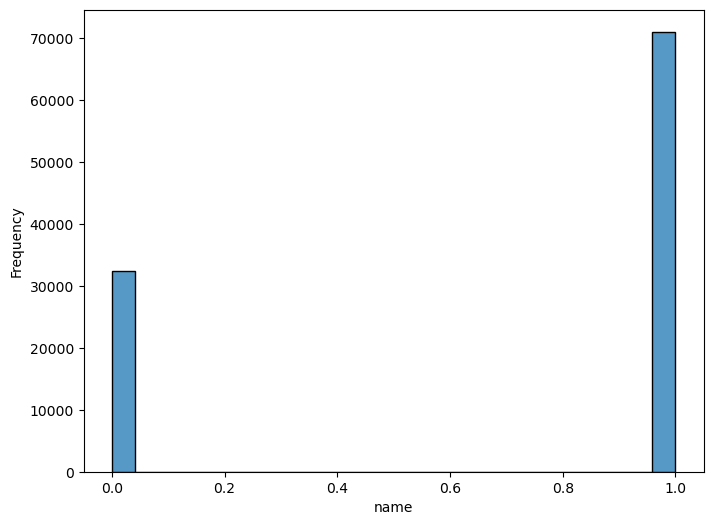

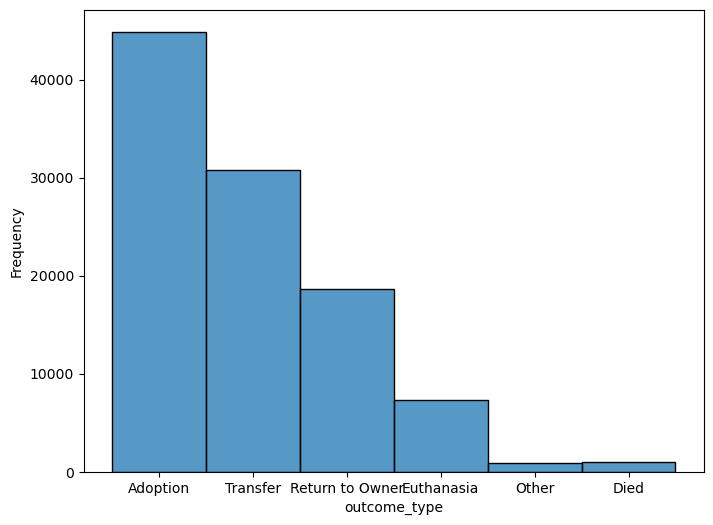

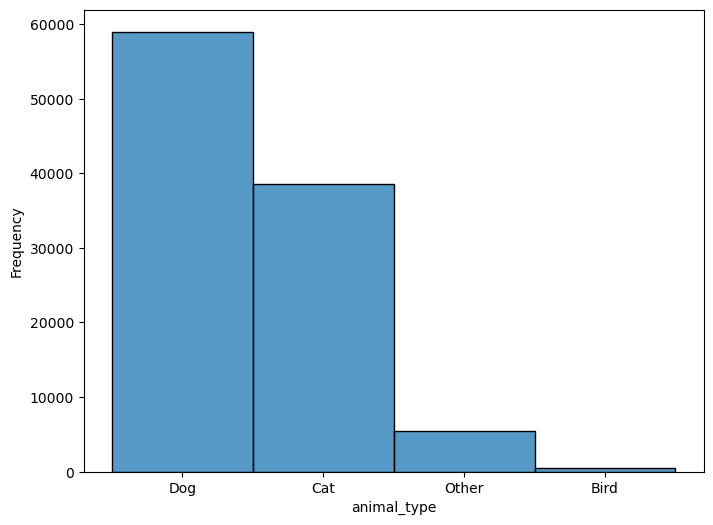

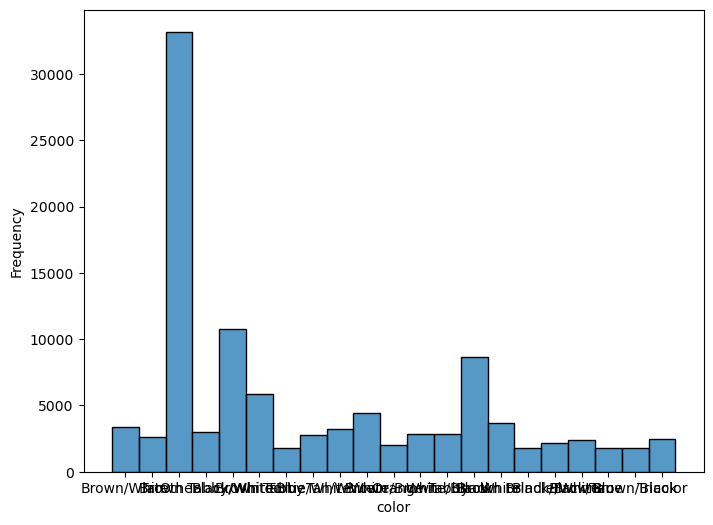

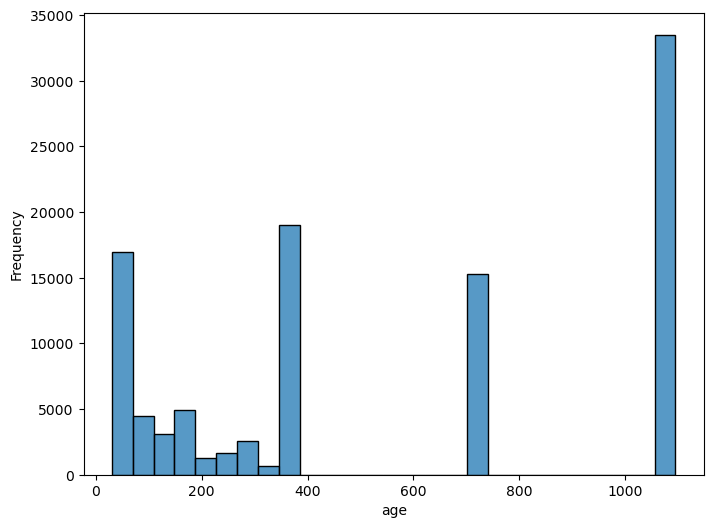

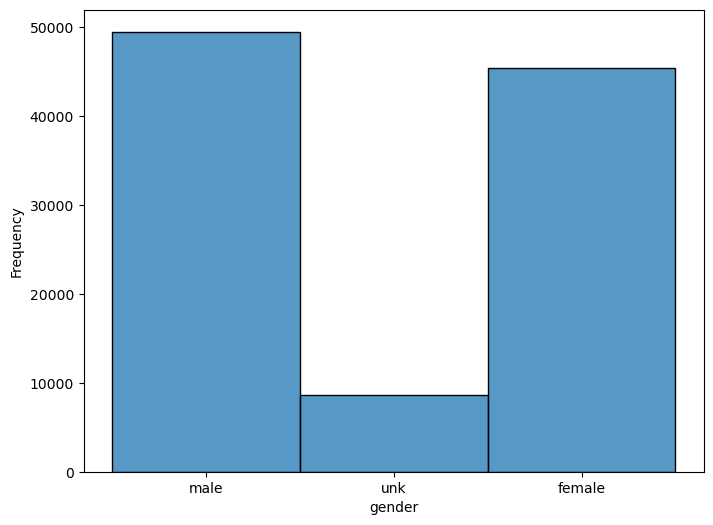

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


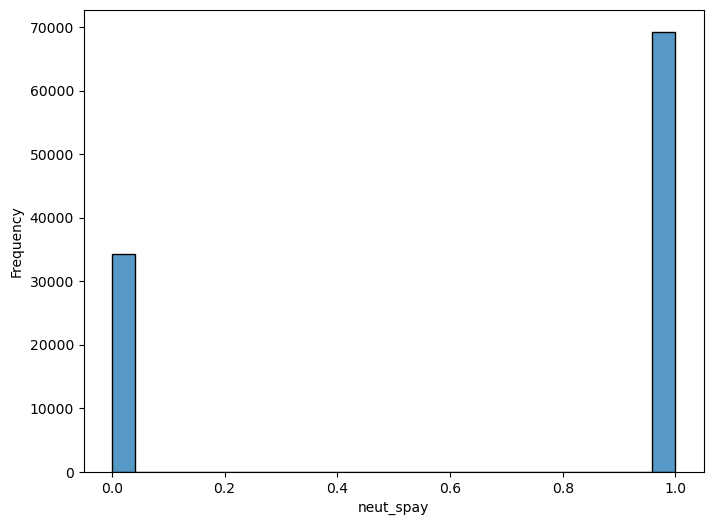

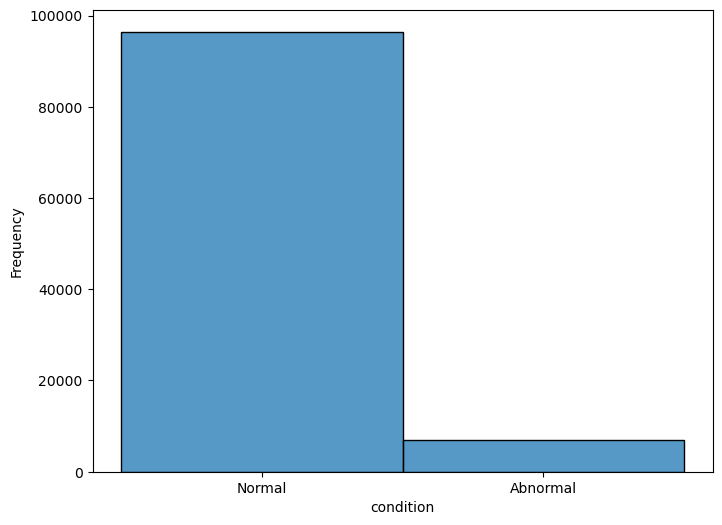

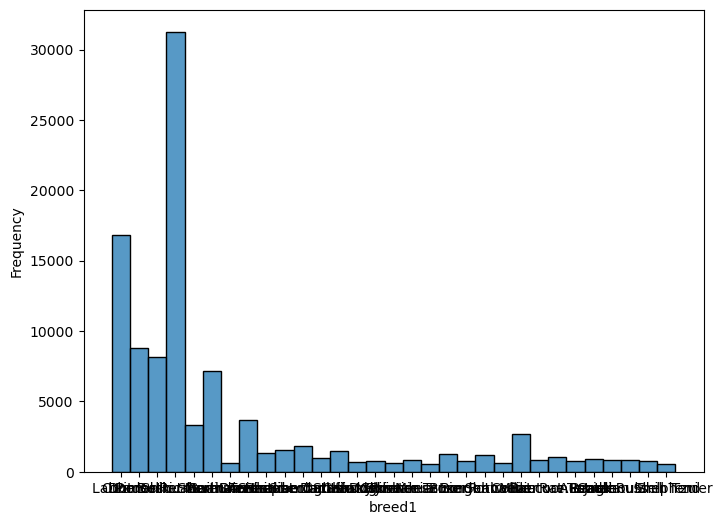

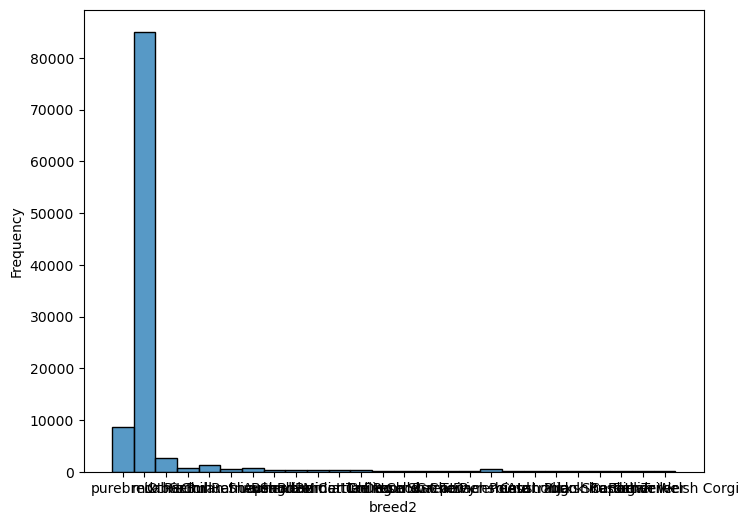

In [6]:
ev.distributions(a)

In [7]:
pd.crosstab(a.outcome_type, a.neut_spay)

neut_spay,False,True
outcome_type,,
Adoption,1960,42922
Died,813,144
Euthanasia,6117,1179
Other,478,396
Return to Owner,5187,13493
Transfer,19645,11133


<Axes: xlabel='outcome_type', ylabel='count'>

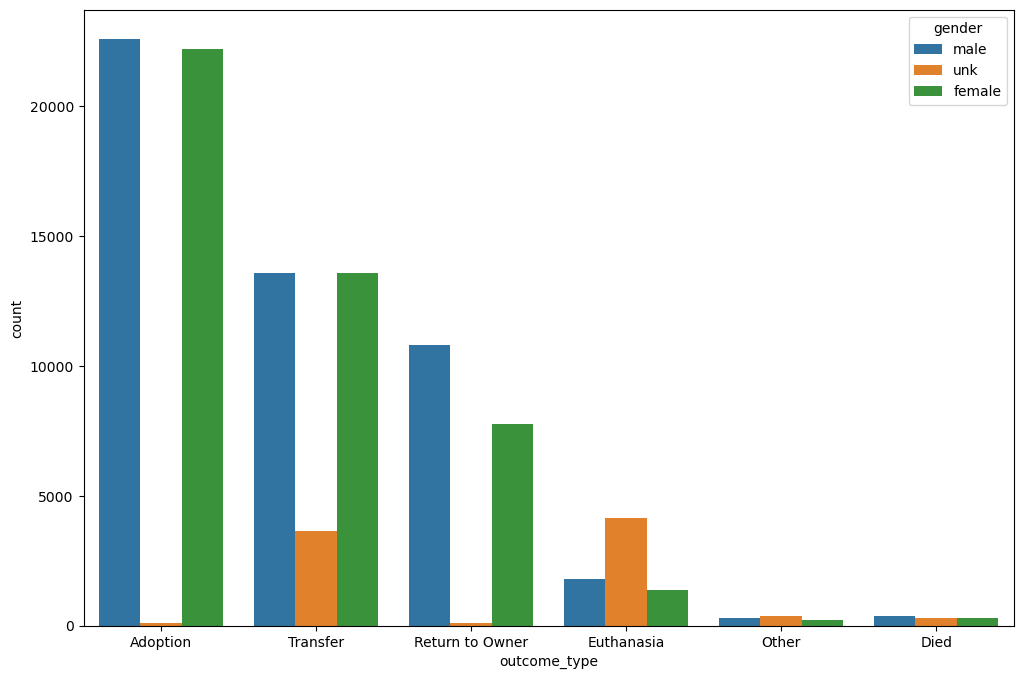

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(a, x='outcome_type', hue='gender')

<Axes: xlabel='outcome_type', ylabel='count'>

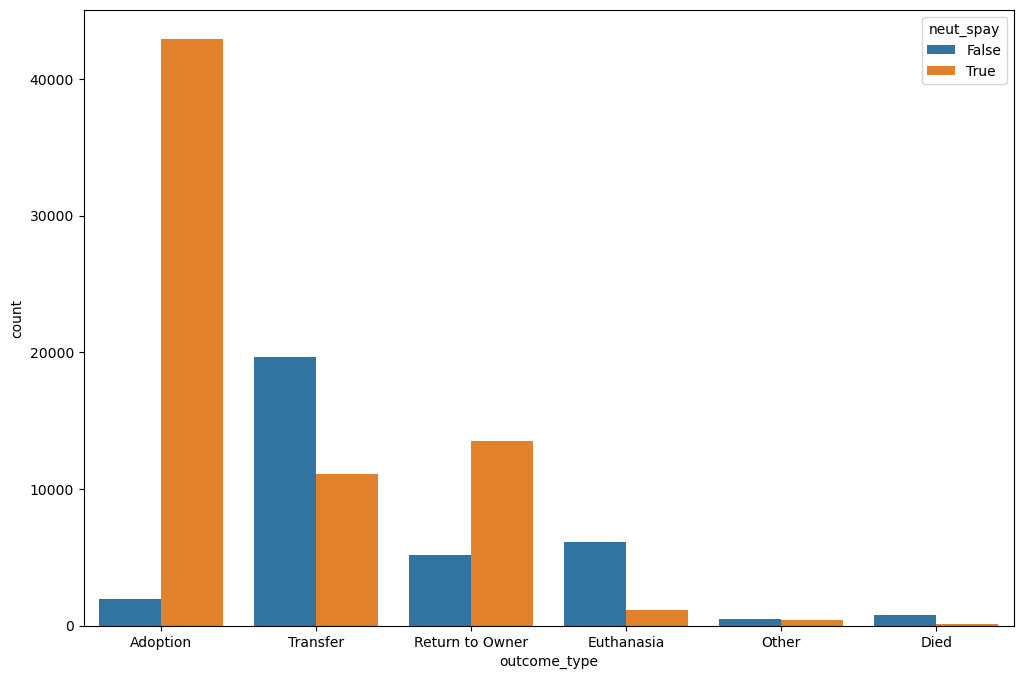

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(a, x='outcome_type', hue='neut_spay')

<Axes: xlabel='outcome_type', ylabel='count'>

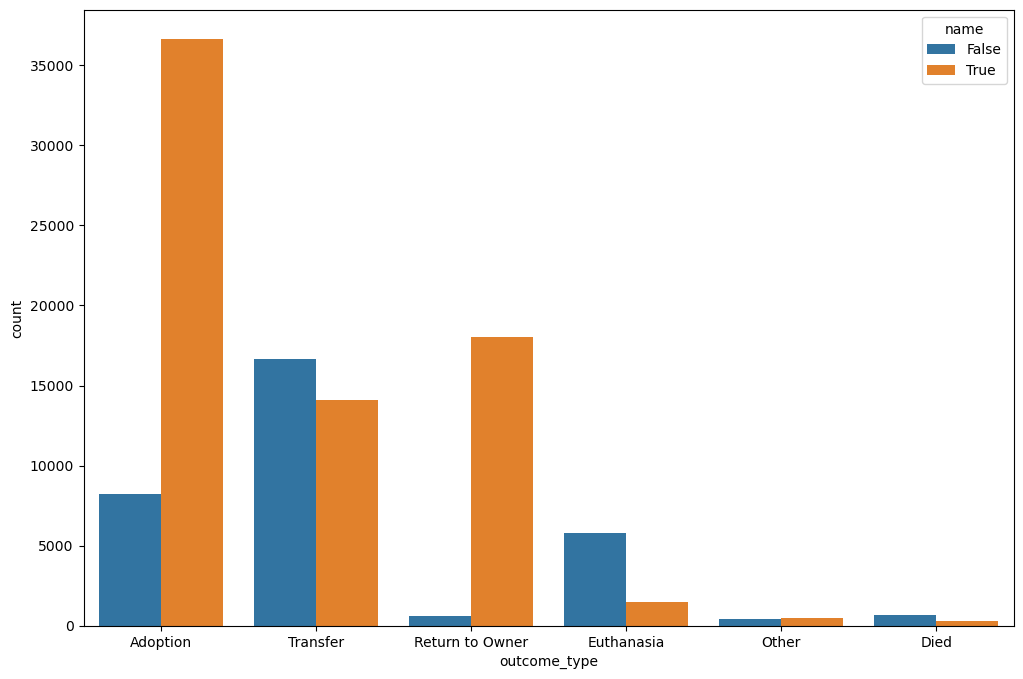

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(a, x='outcome_type', hue='name')

<Axes: xlabel='outcome_type', ylabel='count'>

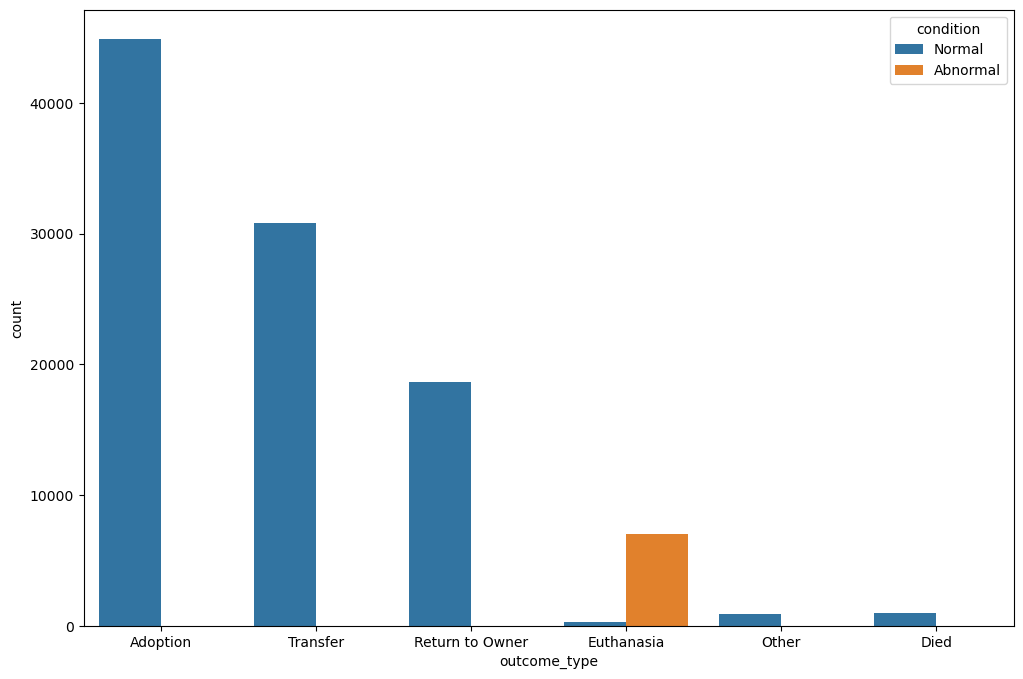

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(a, x='outcome_type', hue='condition')

/var/folders/m4/_r30hp156kj90s9_qf1t1zvc0000gn/T/ipykernel_53494/2327495658.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


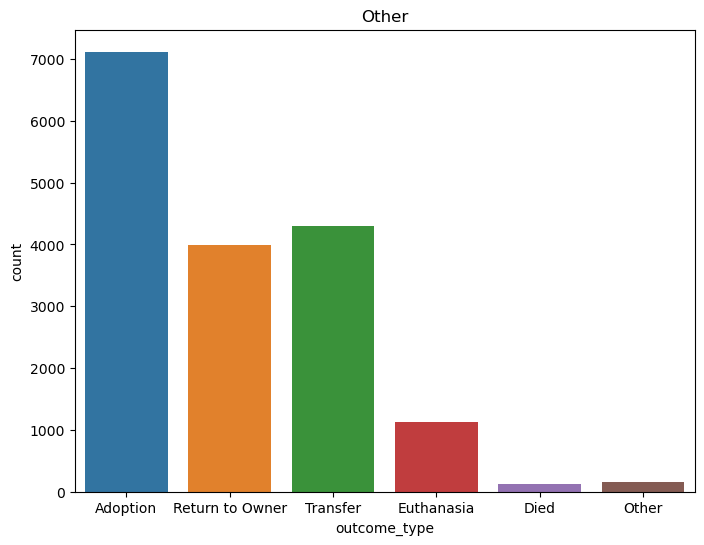

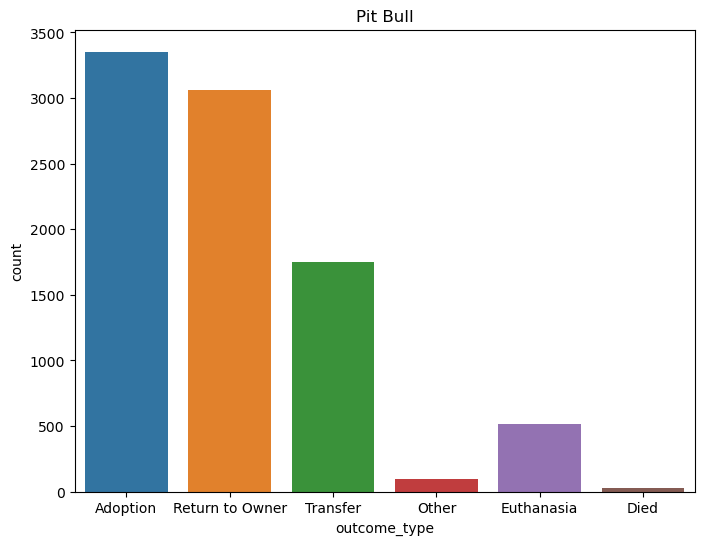

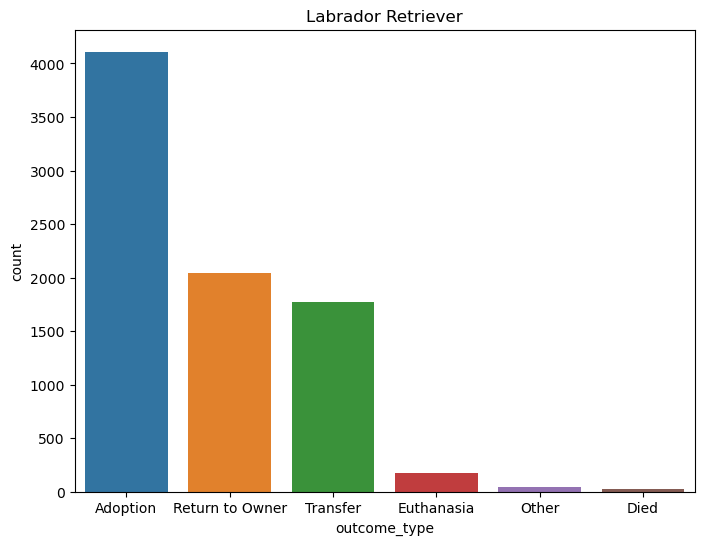

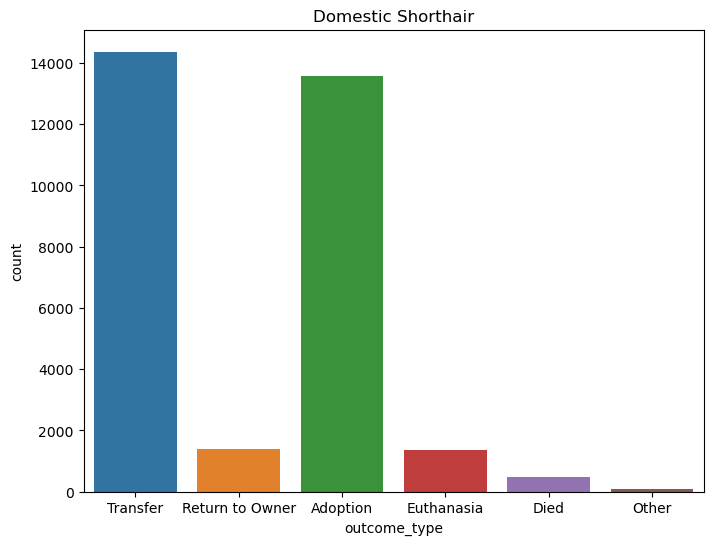

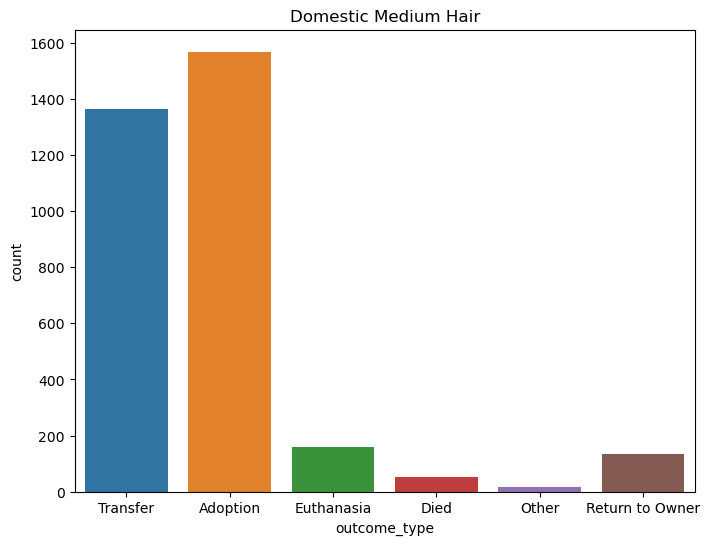

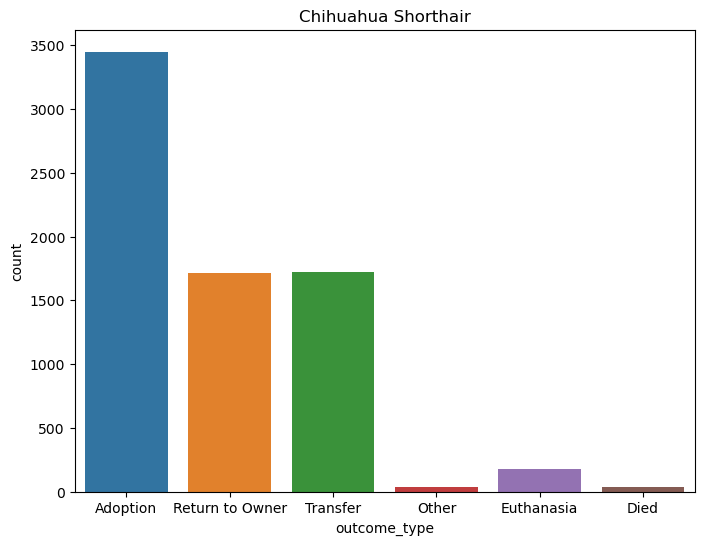

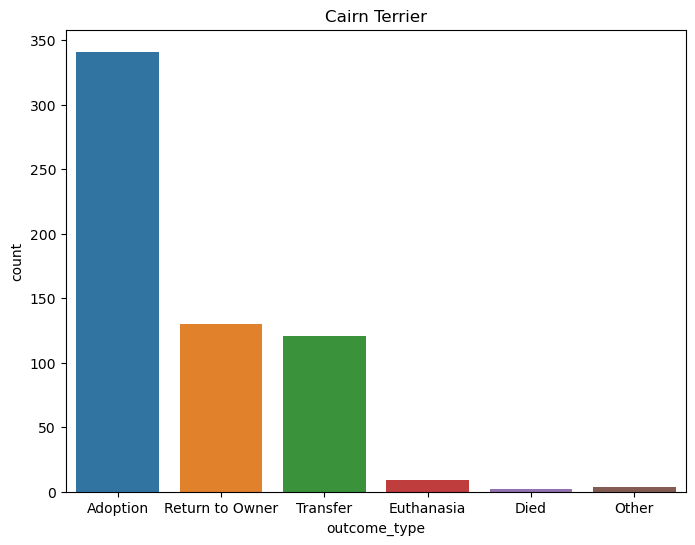

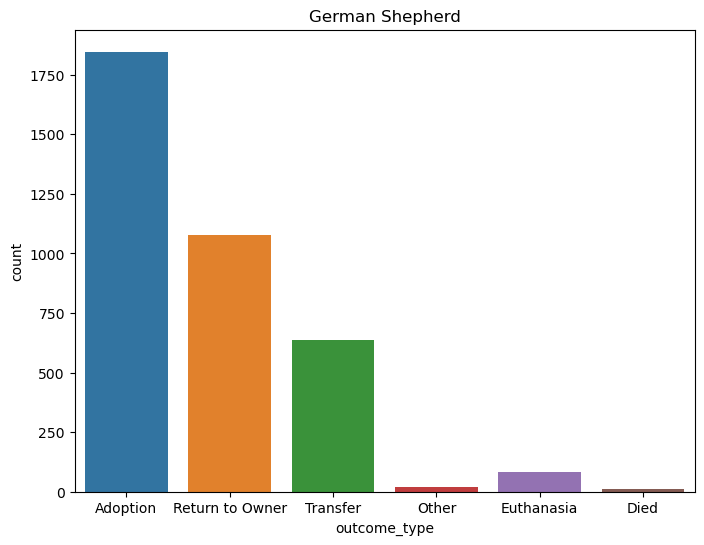

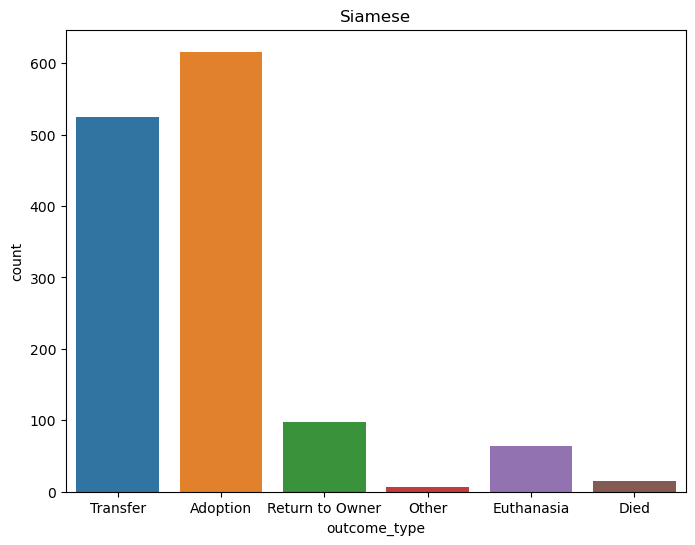

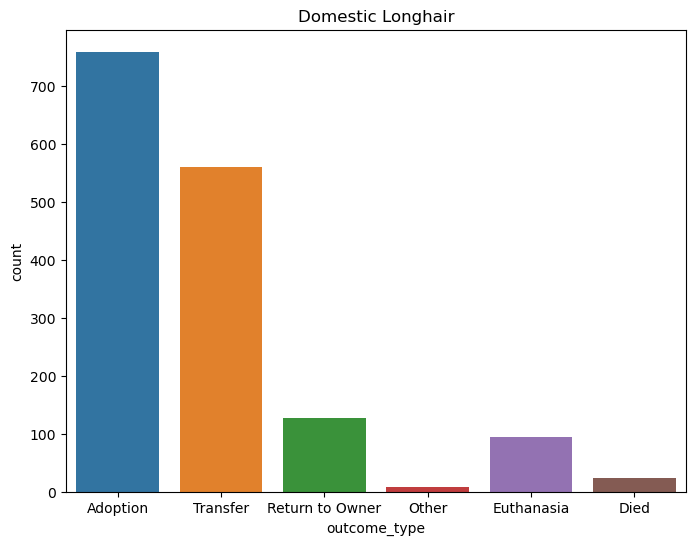

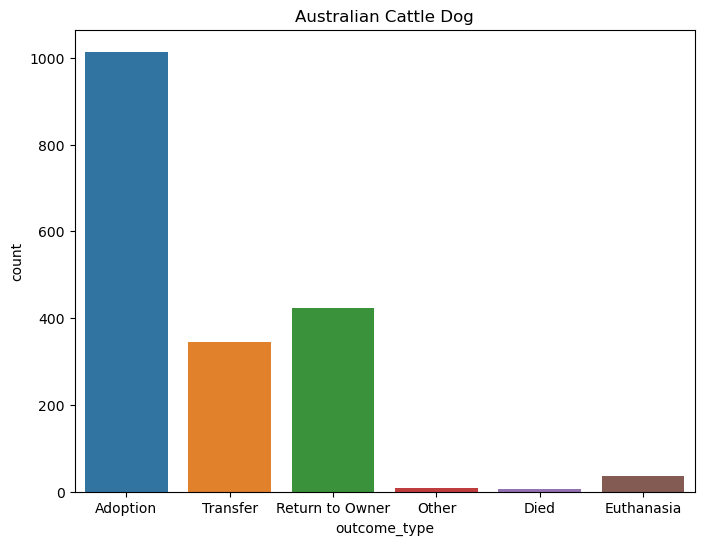

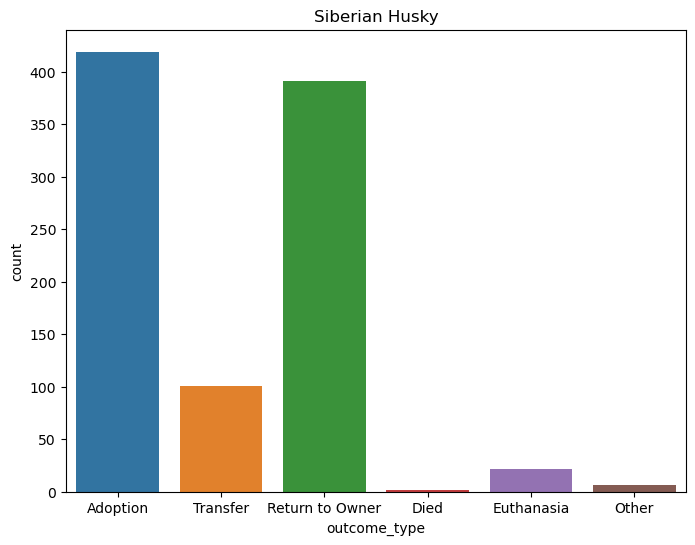

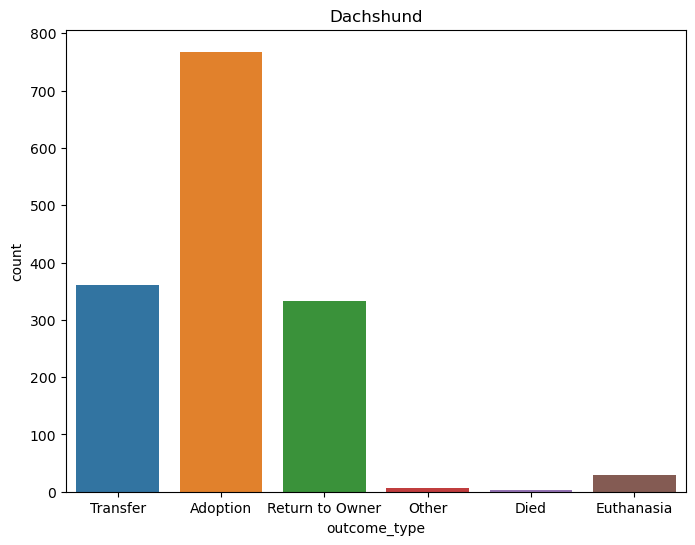

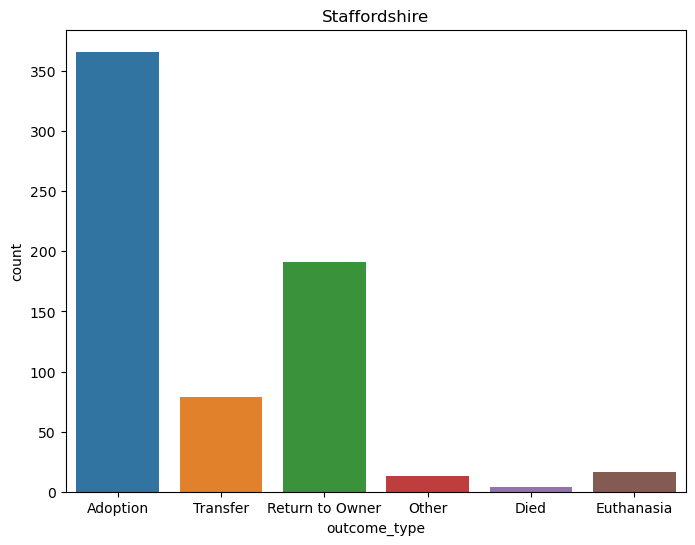

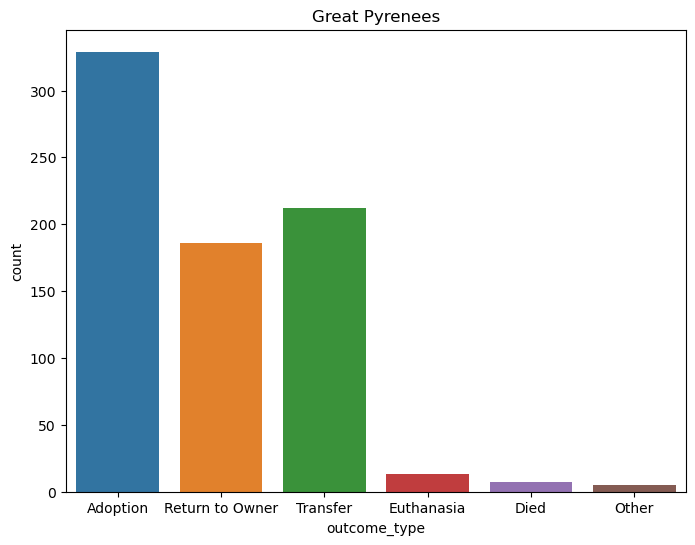

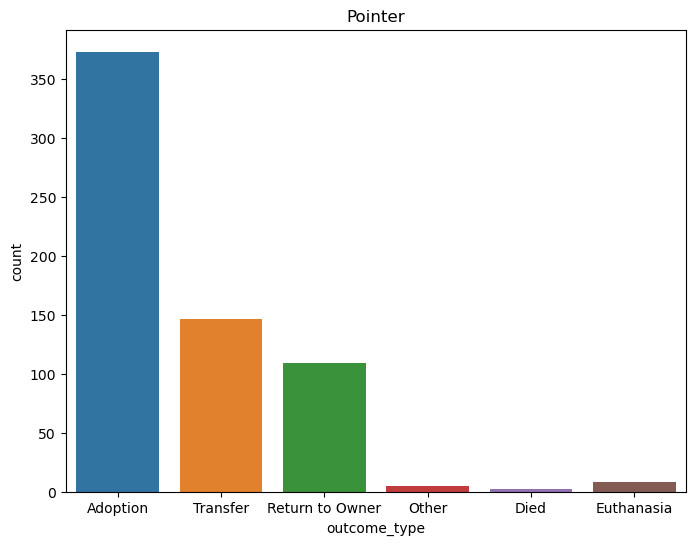

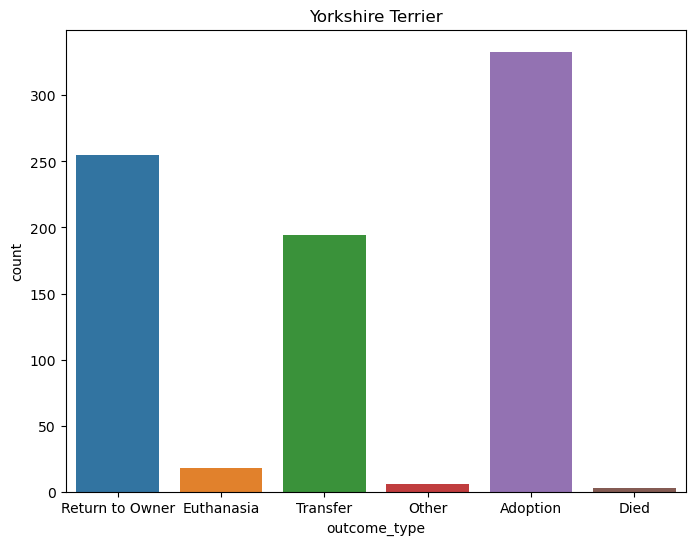

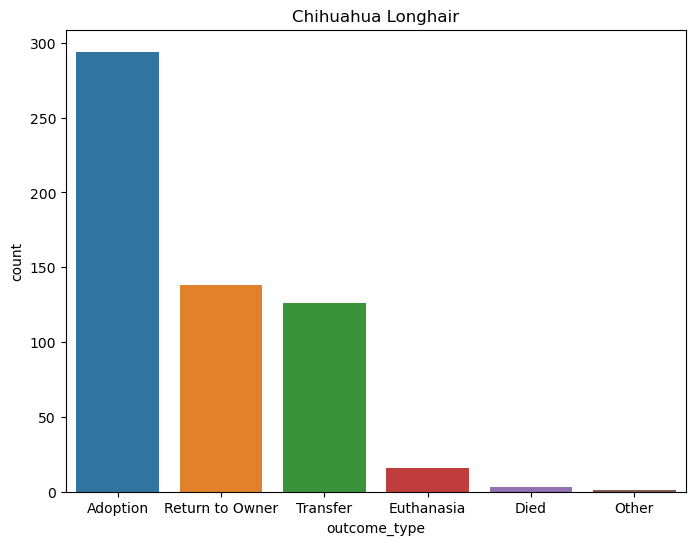

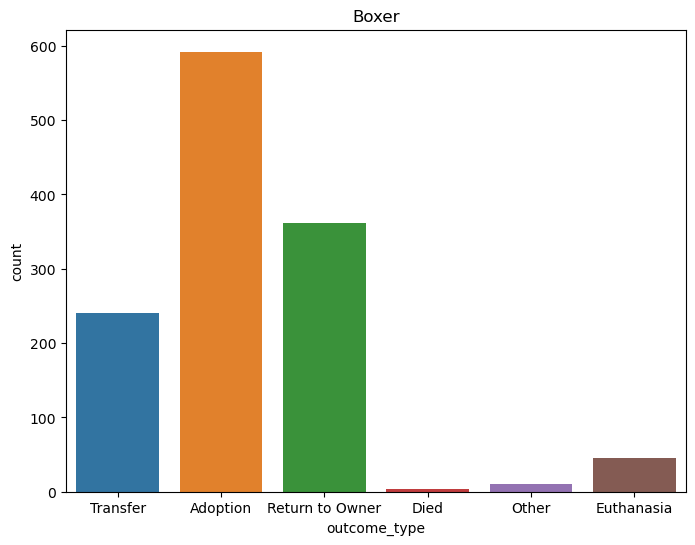

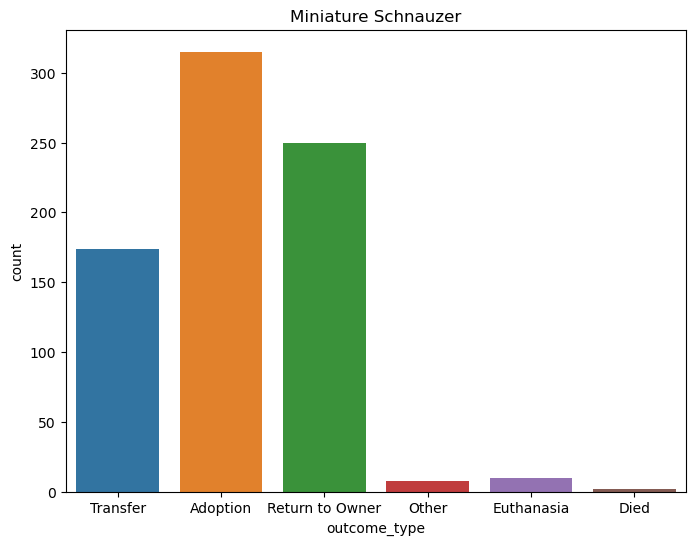

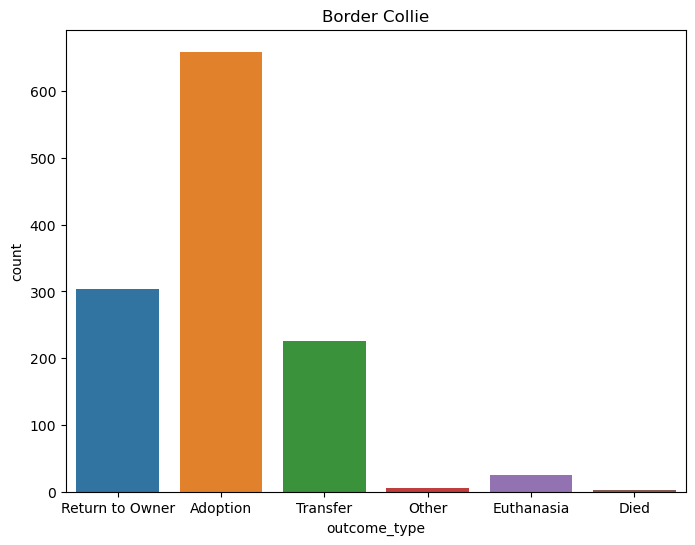

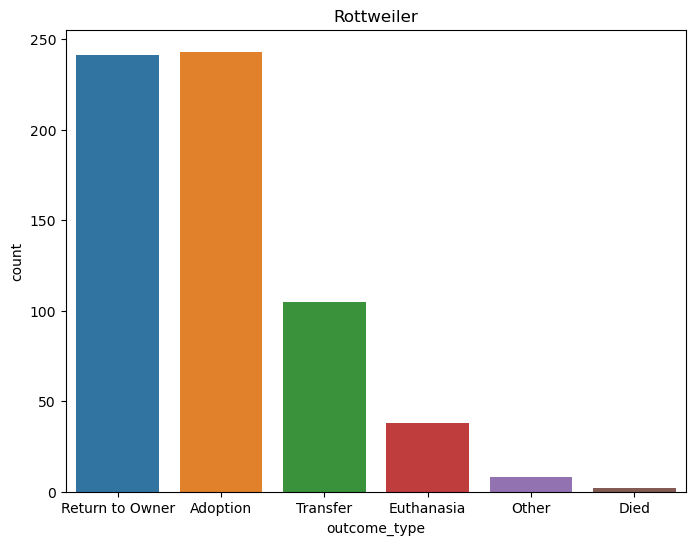

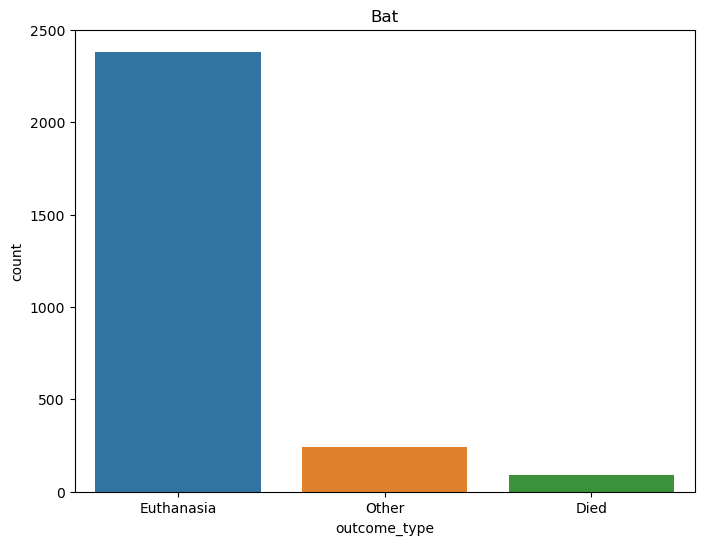

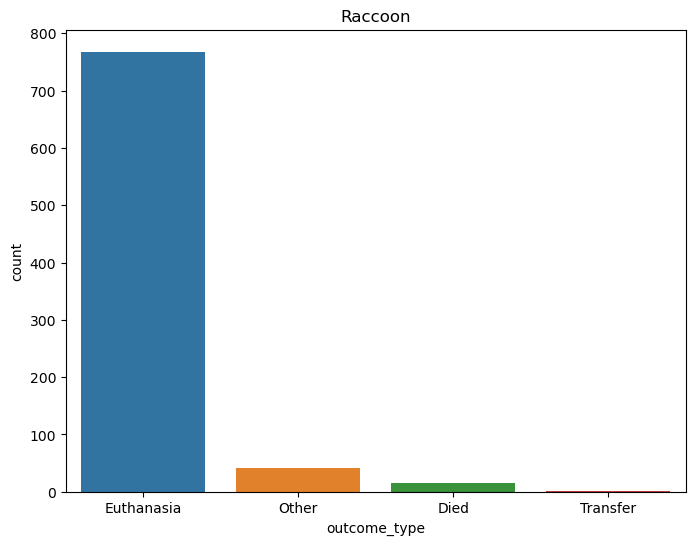

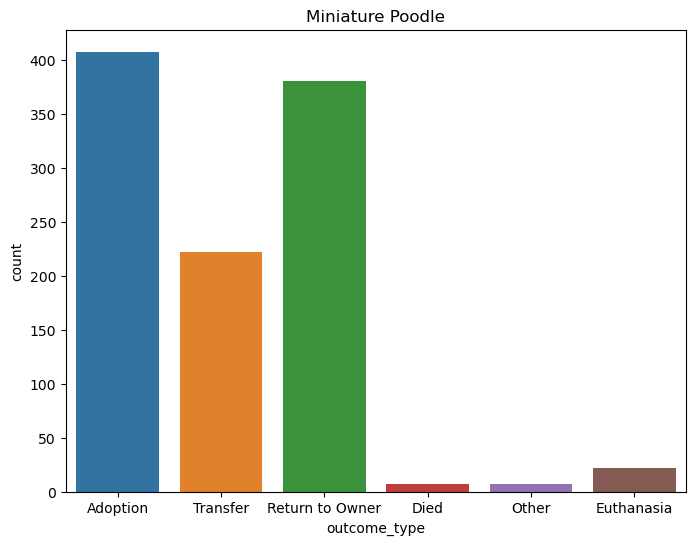

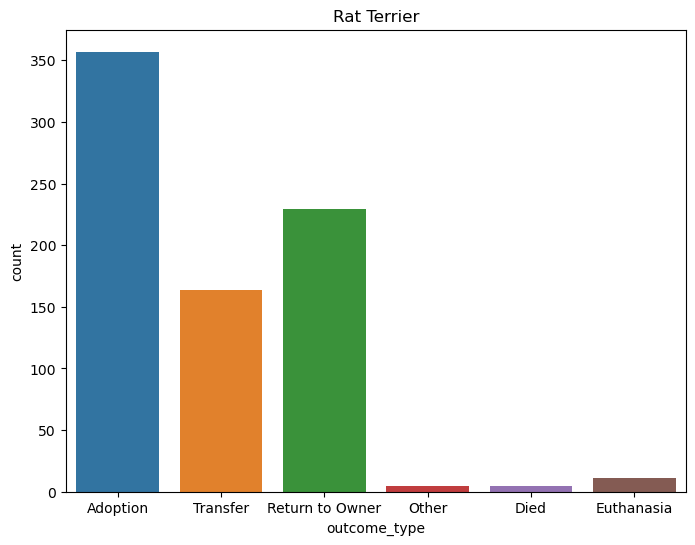

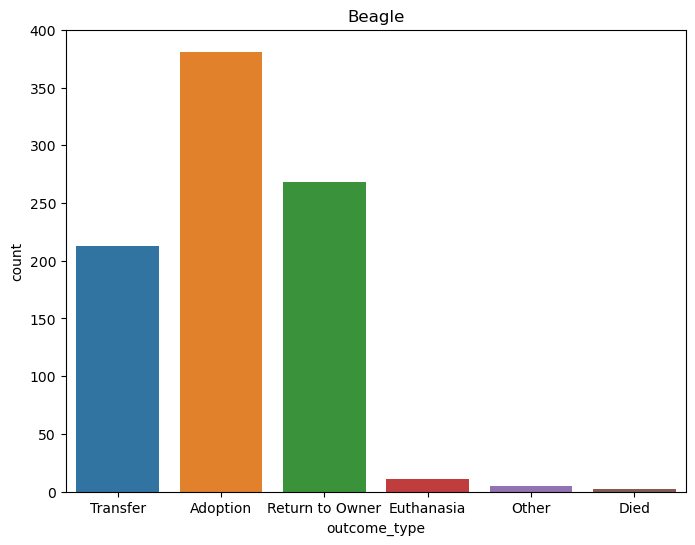

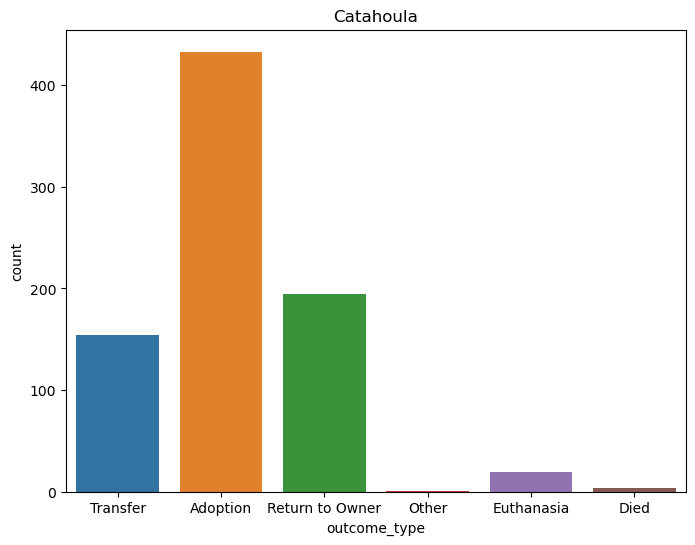

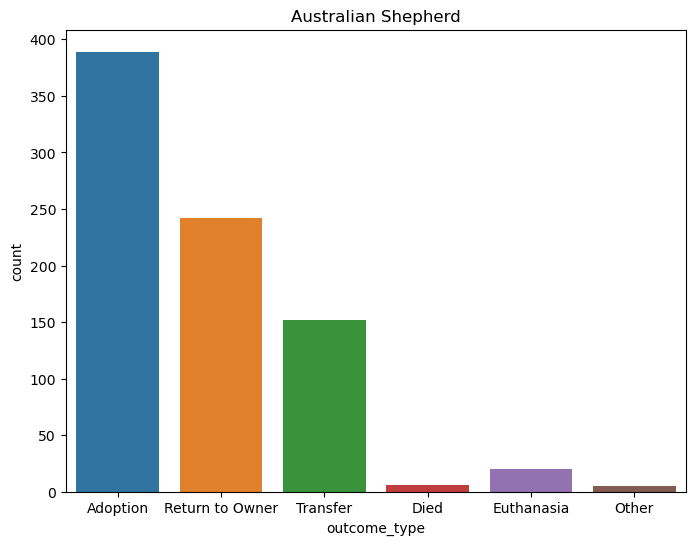

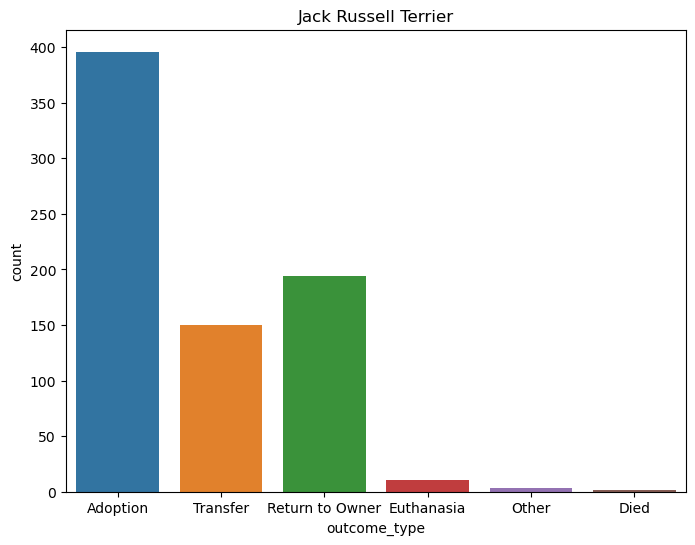

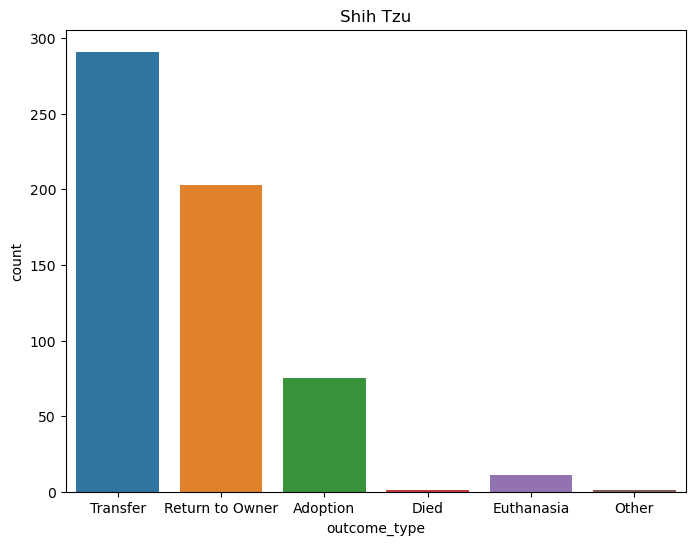

In [11]:
for breed in a.breed1.unique():
    plt.figure(figsize=(8,6))
    sns.countplot(a[a.breed1 == breed], x='outcome_type')
    plt.title(breed)

In [37]:
bird

,name,outcome_type,animal_type,color,age,gender,neut_spay,condition,breed1,breed2
372,False,Euthanasia,Bird,Other,365,unk,False,Abnormal,Other,purebred
730,True,Adoption,Bird,Other,1095,female,False,Normal,Other,purebred
956,False,Died,Bird,Black,1095,unk,False,Normal,Other,purebred
1595,False,Died,Bird,Other,730,unk,False,Normal,Other,purebred
1601,False,Return to Owner,Bird,Other,365,unk,False,Normal,Other,purebred
...,...,...,...,...,...,...,...,...,...,...
100494,False,Euthanasia,Bird,Other,365,male,False,Abnormal,Other,mix
100495,False,Euthanasia,Bird,Other,365,male,False,Abnormal,Other,mix
101361,False,Transfer,Bird,Blue,365,male,False,Normal,Other,mix
101362,False,Transfer,Bird,Other,365,male,False,Normal,Other,mix


<Axes: xlabel='age', ylabel='count'>

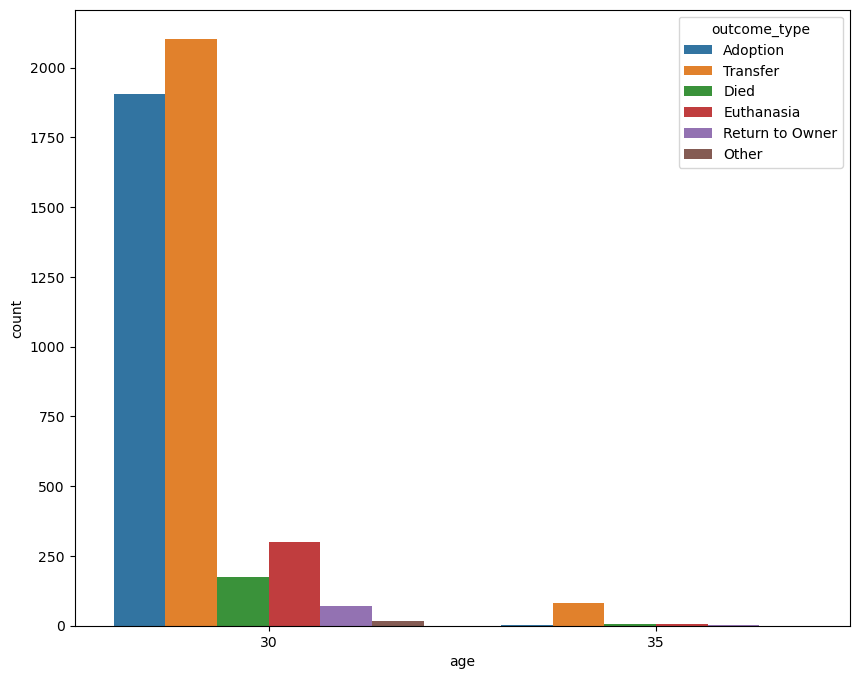

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(a[a.age < 60], x='age', hue='outcome_type')

In [ ]:
np.where(a.age > 730, )

<Axes: xlabel='age', ylabel='count'>

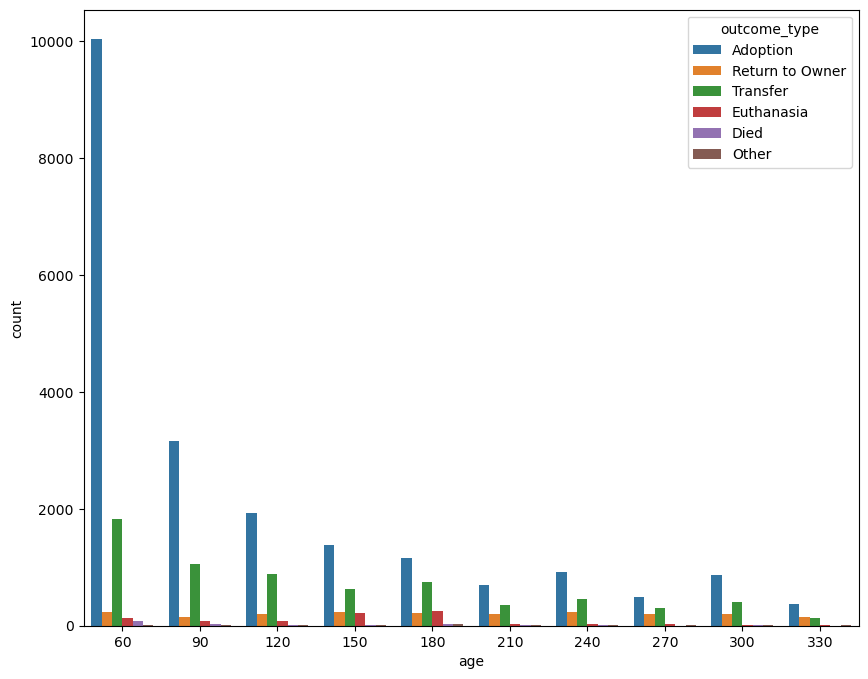

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(a[(a.age > 35) & (a.age < 365)], x='age', hue='outcome_type')

In [39]:
an = pd.read_csv('AustinAnimalWorld.csv')

In [43]:
an = pd.read_csv('AustinAnimalWorld.csv')
an.columns = an.columns.str.lower().str.replace(' ','_')
an.sex_upon_outcome = an.sex_upon_outcome.fillna('Unknown')

In [45]:
birdies = an[an.animal_type == 'Bird']

In [48]:
euthanized_birds = birdies[birdies.outcome_type == 'Euthanasia']

In [50]:
len(euthanized_birds)

107

In [49]:
euthanized_birds.outcome_subtype.value_counts()

Suffering    92
Medical      10
Underage      1
Name: outcome_subtype, dtype: int64

<Axes: xlabel='age', ylabel='count'>

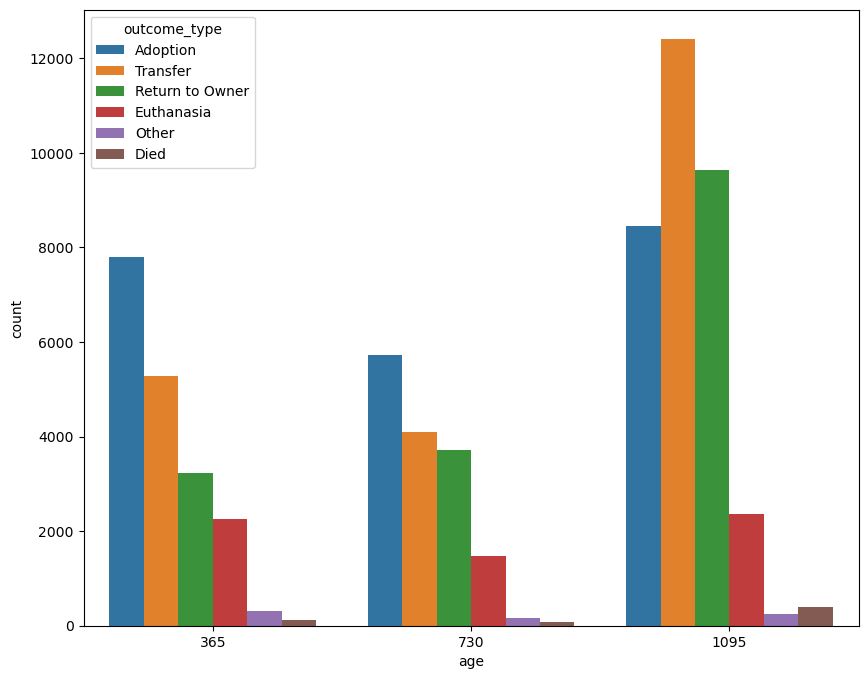

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(a[a.age > 364], x='age', hue='outcome_type')

/var/folders/m4/_r30hp156kj90s9_qf1t1zvc0000gn/T/ipykernel_53494/3245826791.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


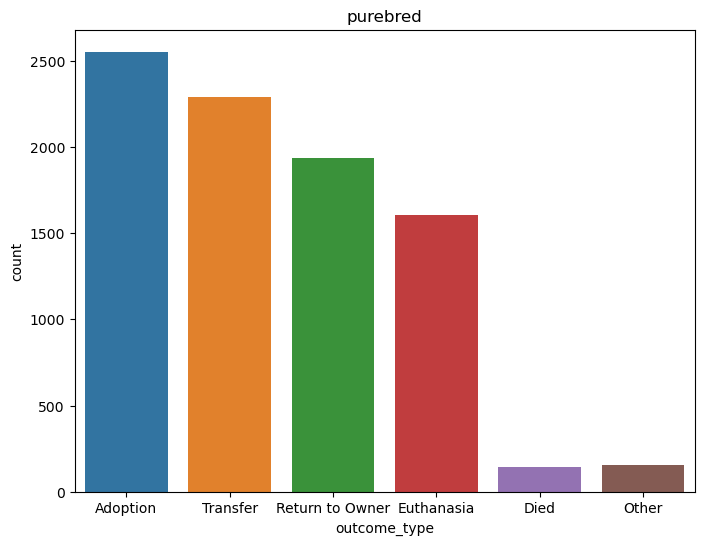

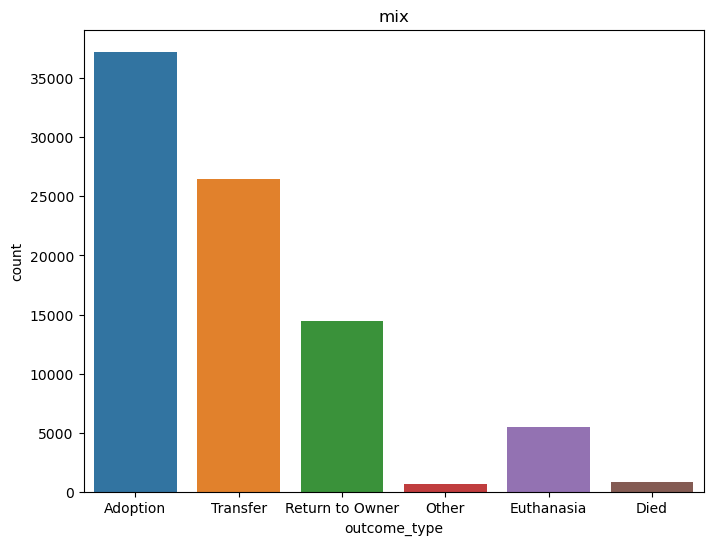

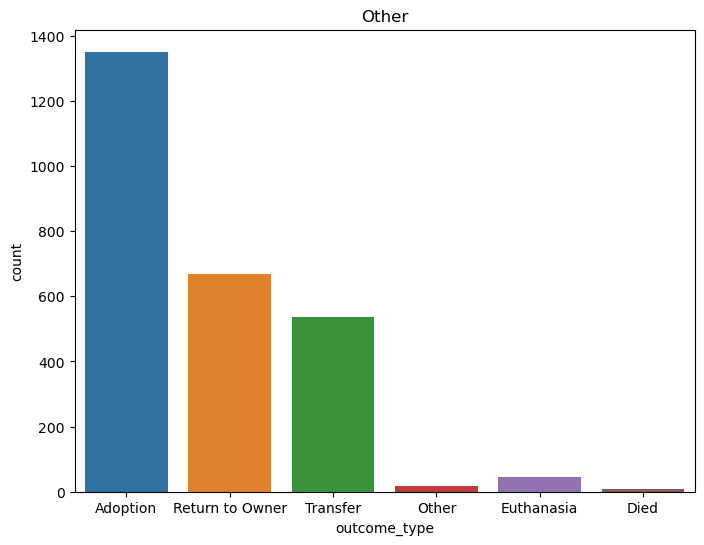

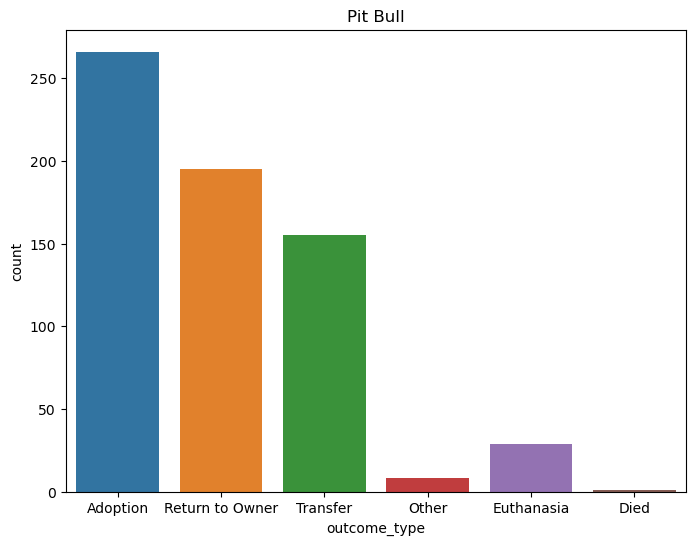

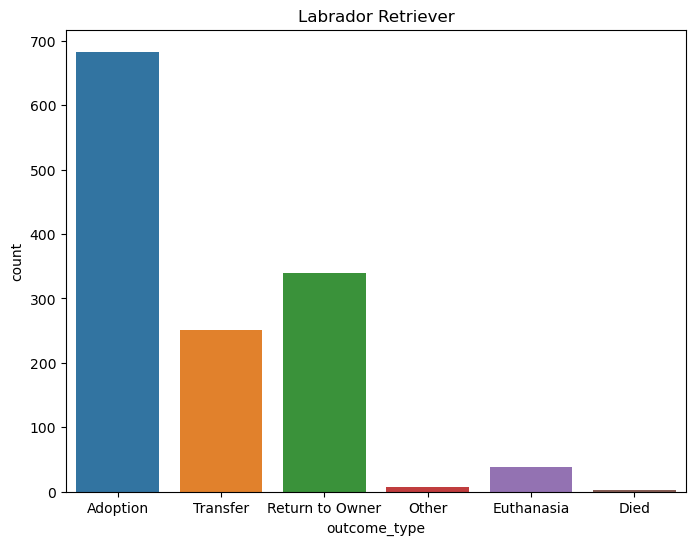

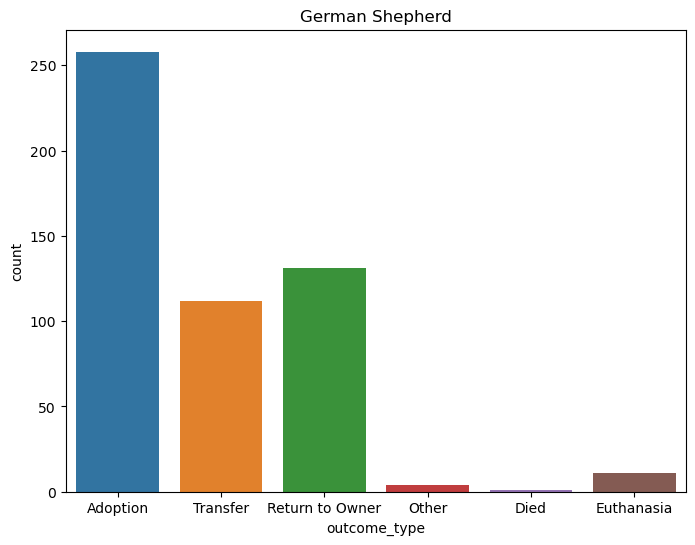

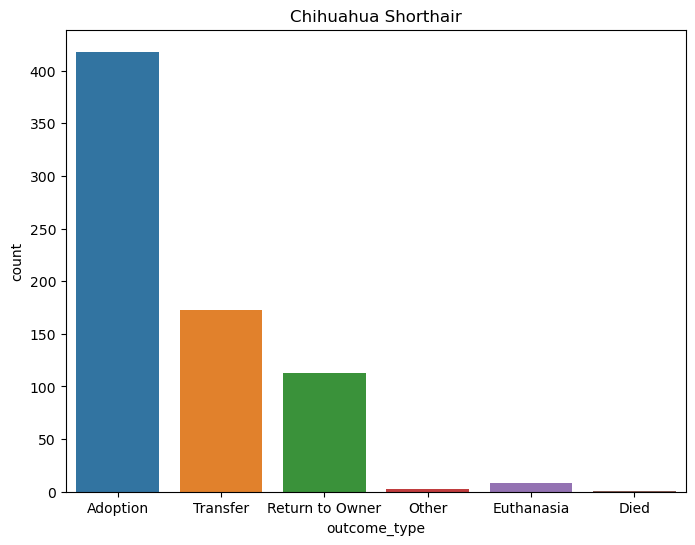

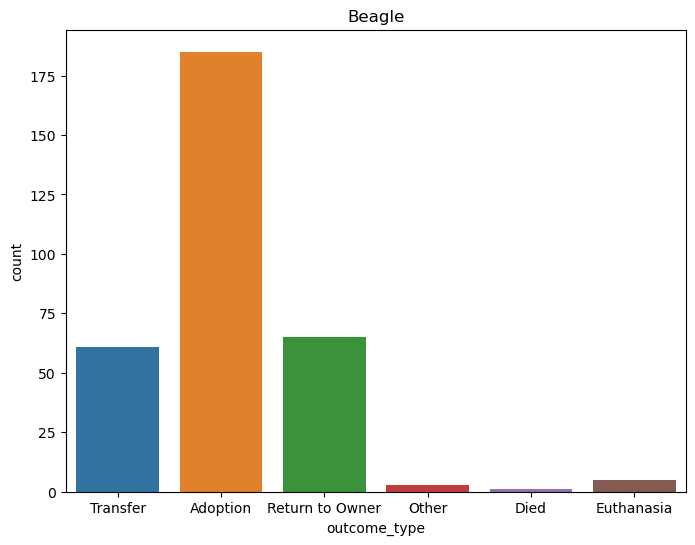

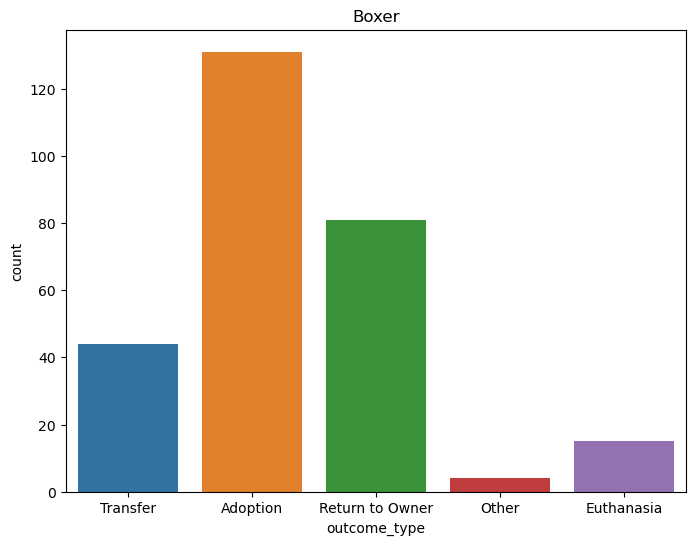

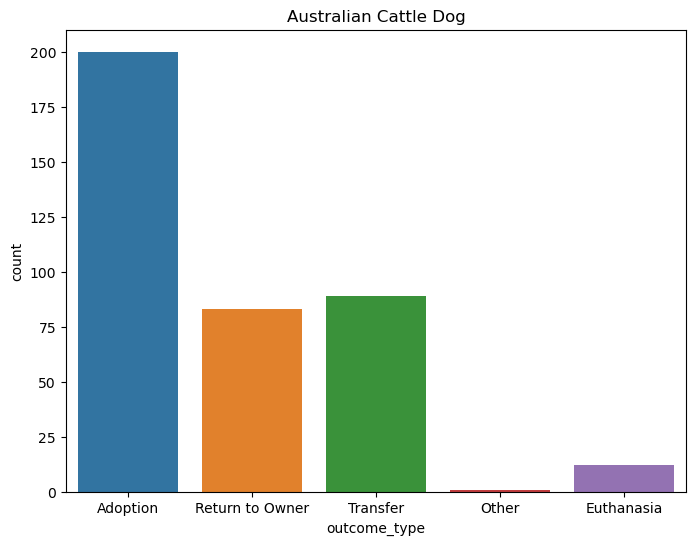

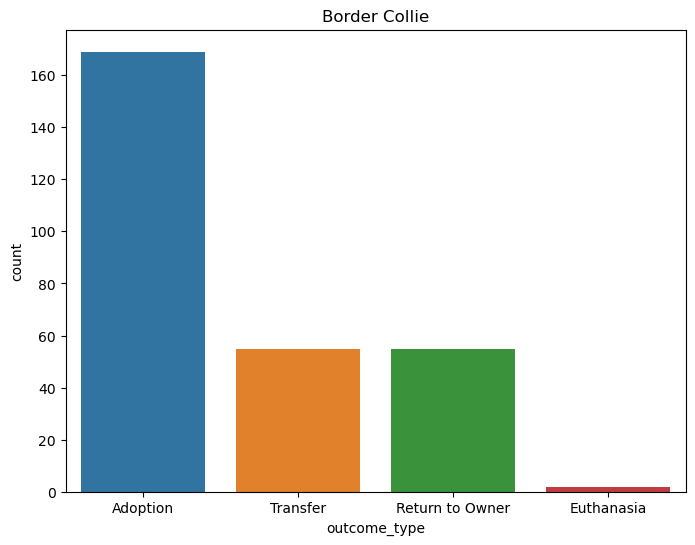

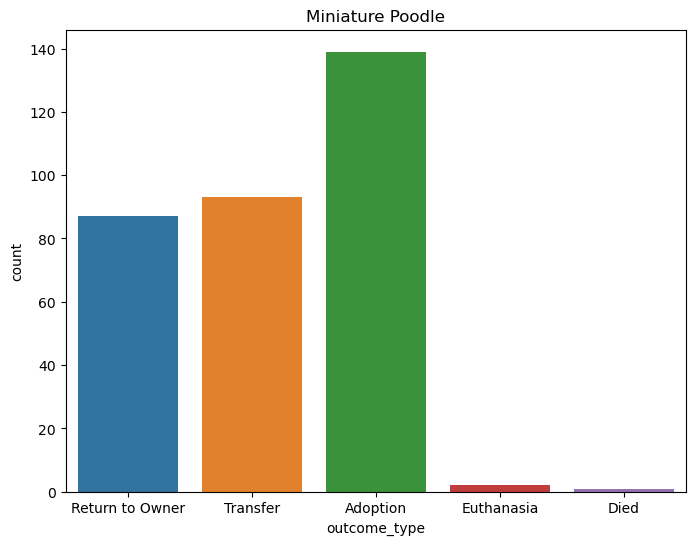

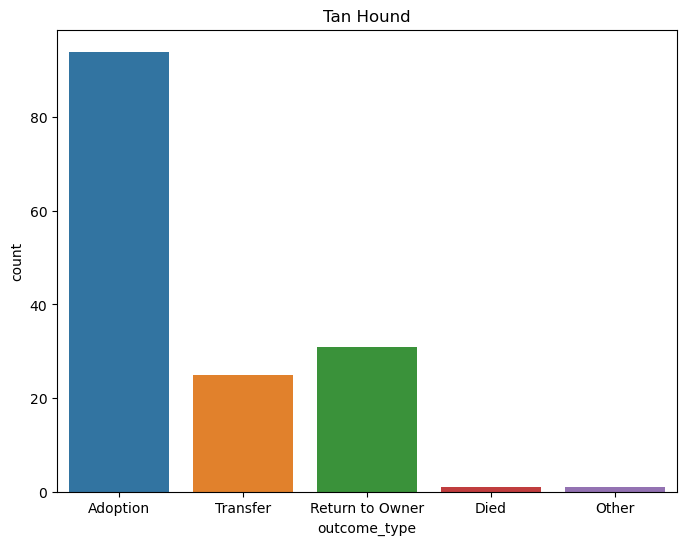

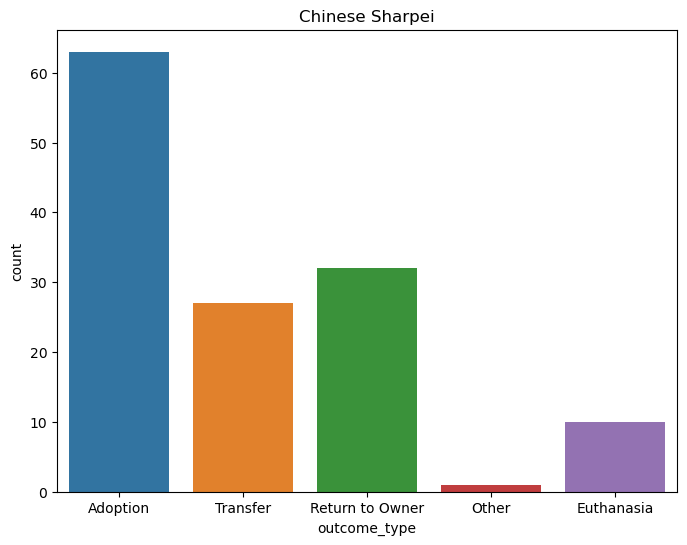

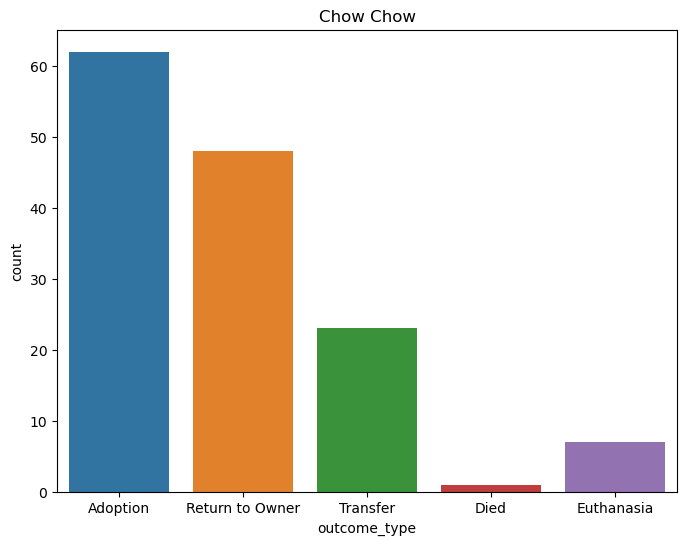

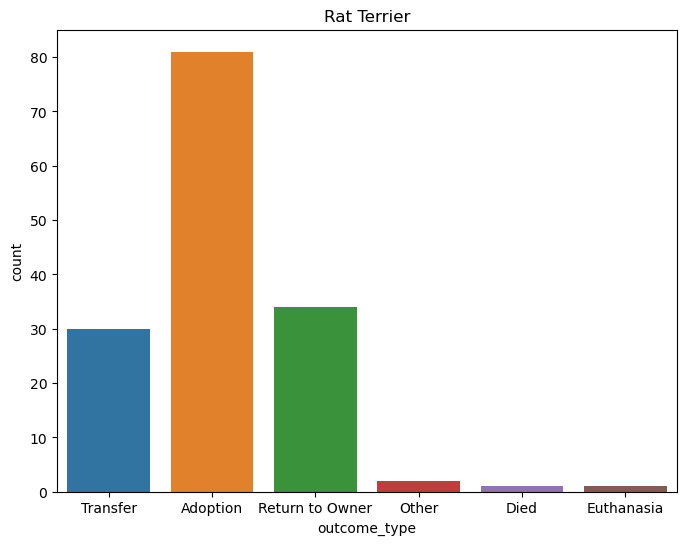

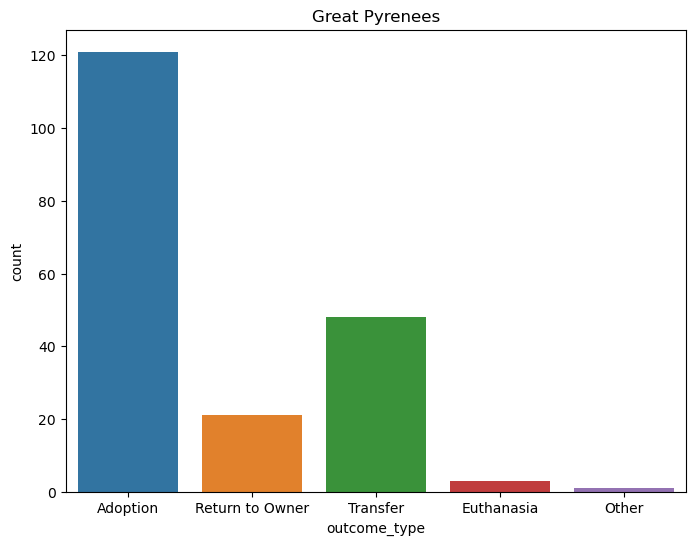

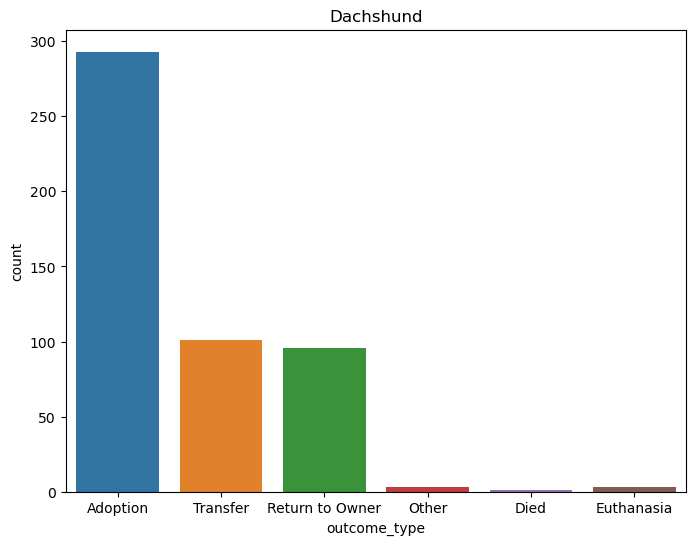

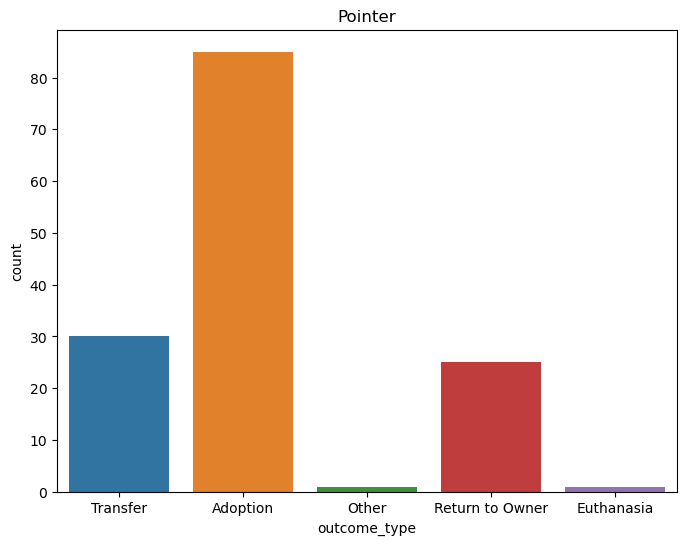

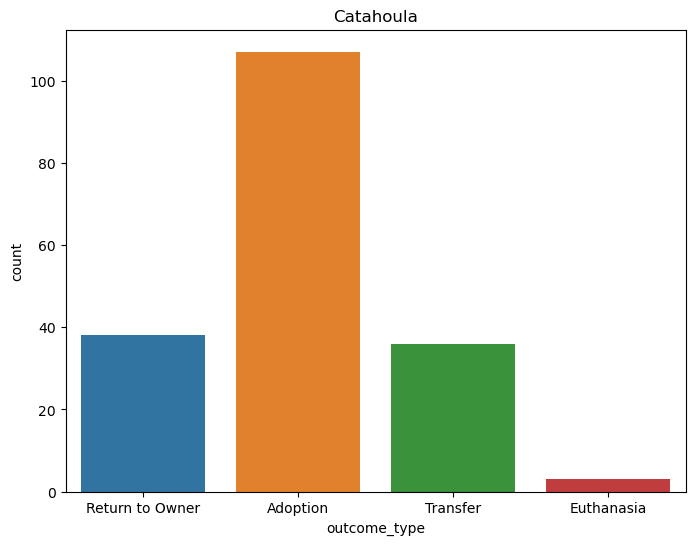

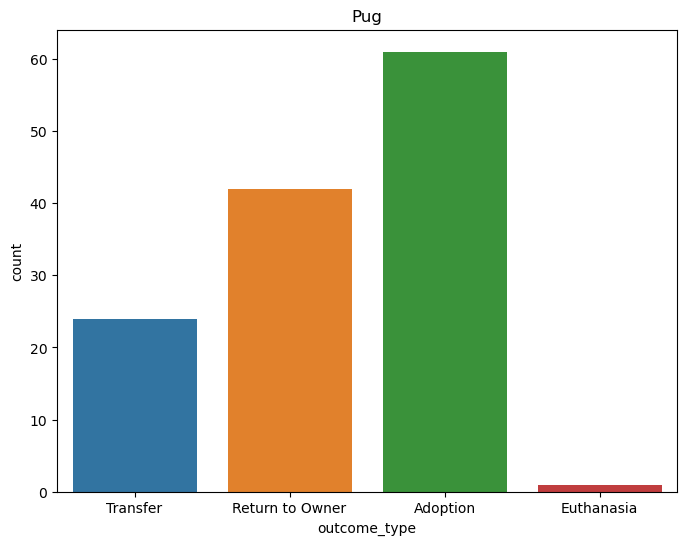

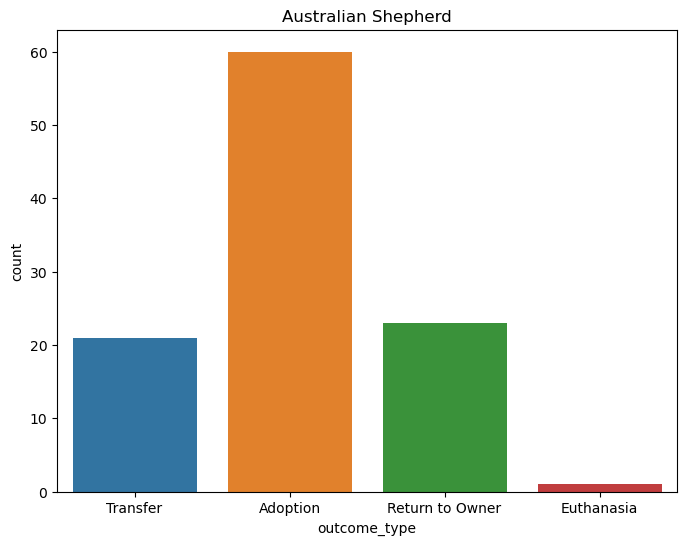

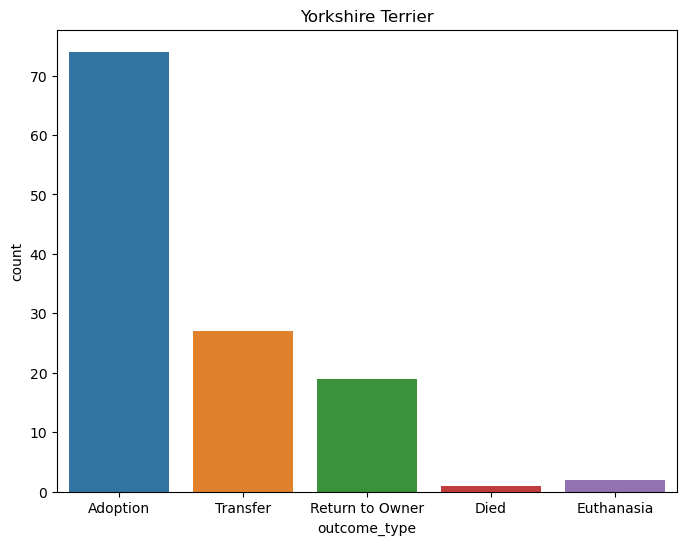

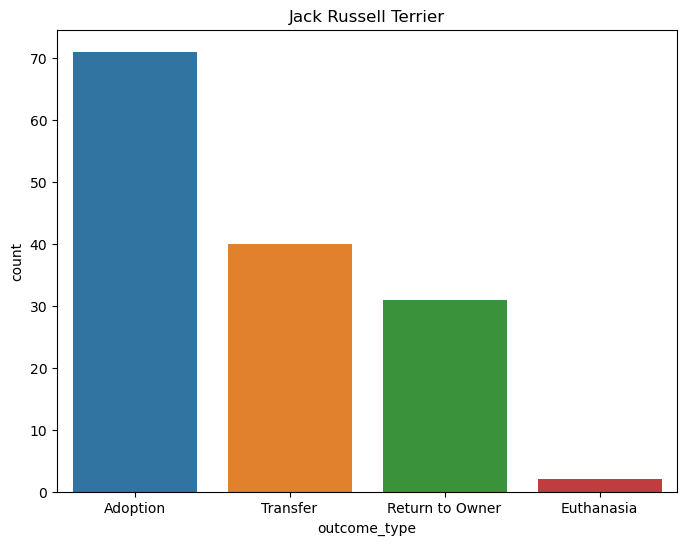

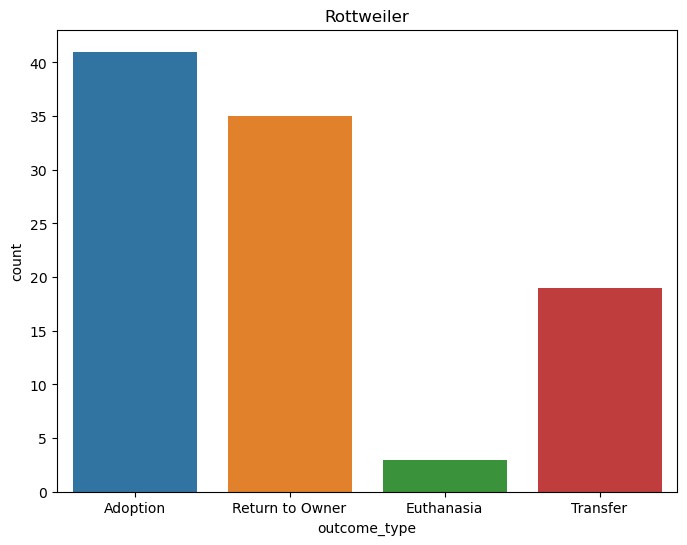

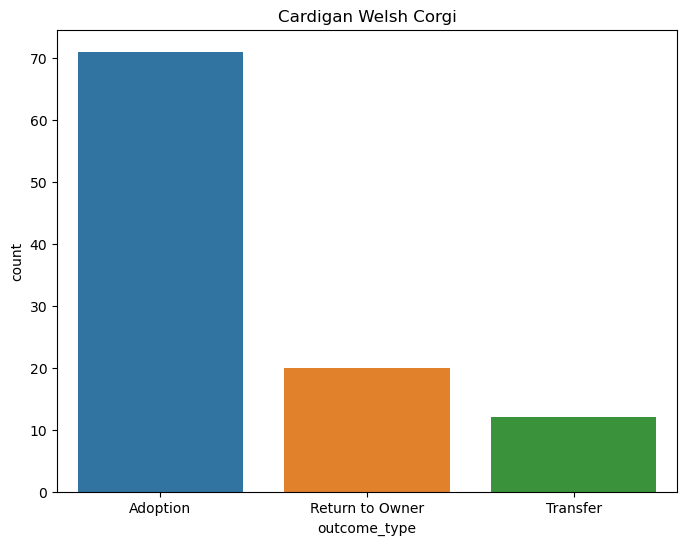

In [15]:
for breed in a.breed2.unique():
    plt.figure(figsize=(8,6))
    sns.countplot(a[a.breed2 == breed], x='outcome_type')
    plt.title(breed)

In [16]:
a[a.breed1 == 'Pit Bull']

,name,outcome_type,animal_type,color,age,gender,neut_spay,condition,breed1,breed2
1,True,Adoption,Dog,Tan,730,male,True,Normal,Pit Bull,mix
34,True,Return to Owner,Dog,Other,365,male,True,Normal,Pit Bull,mix
36,True,Adoption,Dog,Brown Brindle/White,30,male,False,Normal,Pit Bull,purebred
39,True,Adoption,Dog,Other,1095,female,True,Normal,Pit Bull,mix
42,True,Return to Owner,Dog,Black,150,male,False,Normal,Pit Bull,mix
...,...,...,...,...,...,...,...,...,...,...
103435,True,Euthanasia,Dog,Blue/White,1095,female,False,Abnormal,Pit Bull,mix
103436,True,Euthanasia,Dog,Black/White,730,female,True,Abnormal,Pit Bull,mix
103437,True,Euthanasia,Dog,Other,1095,male,True,Abnormal,Pit Bull,mix
103439,True,Transfer,Dog,Brown/White,730,male,True,Normal,Pit Bull,mix


<Axes: xlabel='outcome_type', ylabel='count'>

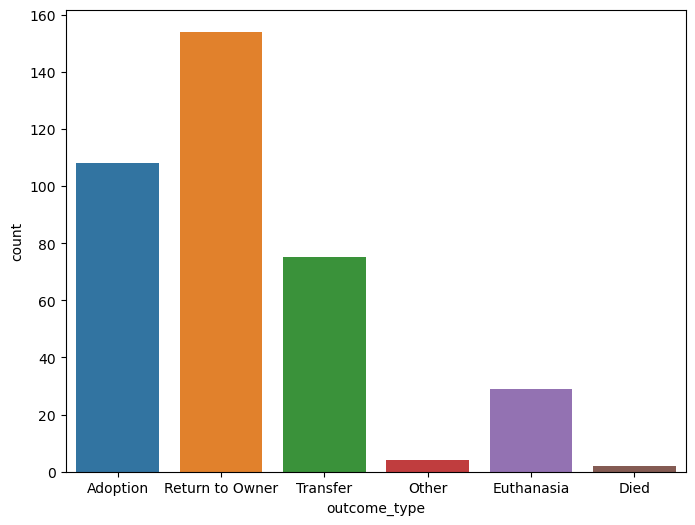

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(a[(a.breed1 == 'Pit Bull') & (a.breed2 == 'purebred')], x='outcome_type')

<Axes: xlabel='outcome_type', ylabel='count'>

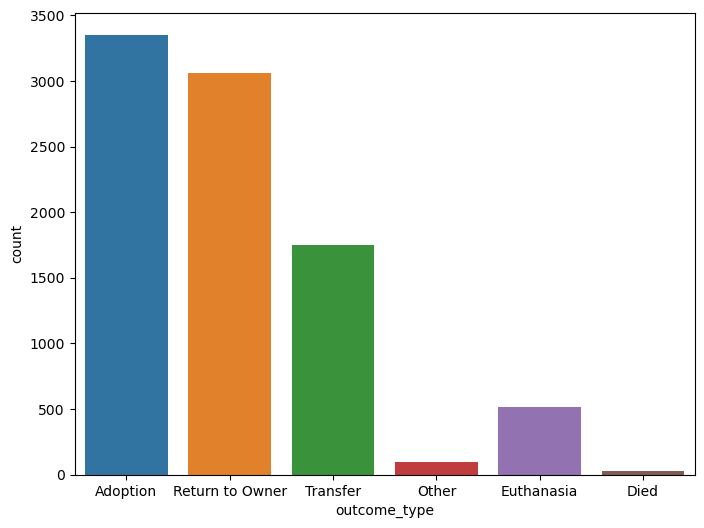

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(a[(a.breed1 == 'Pit Bull')], x='outcome_type')

/var/folders/m4/_r30hp156kj90s9_qf1t1zvc0000gn/T/ipykernel_53494/2038429952.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


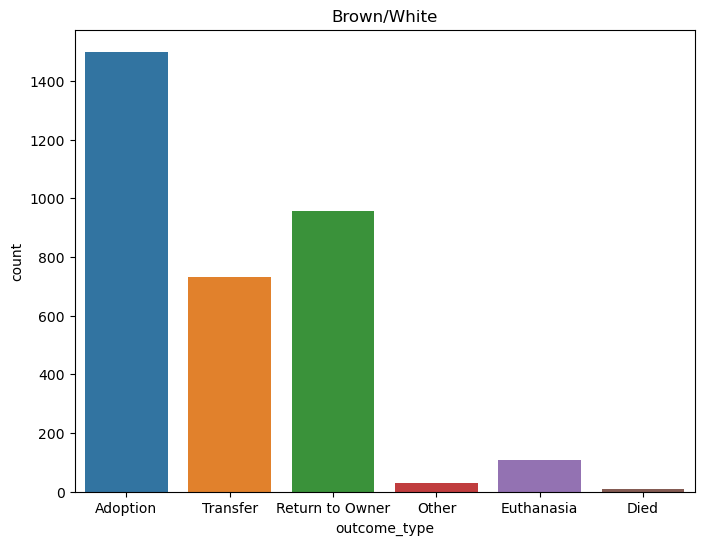

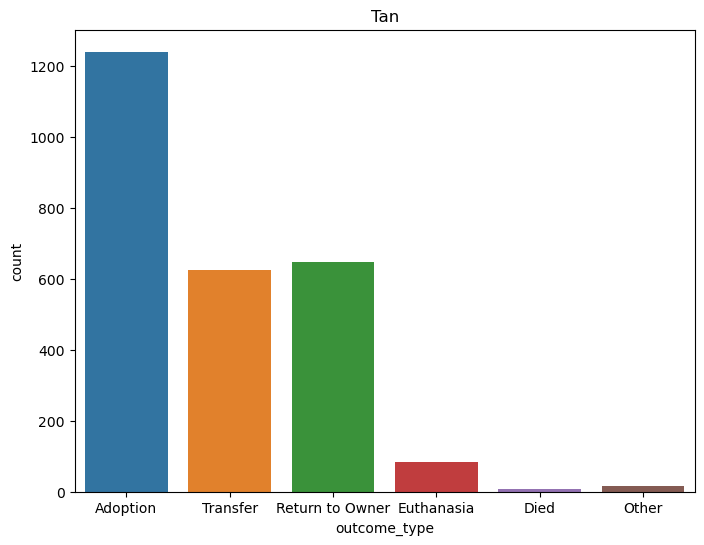

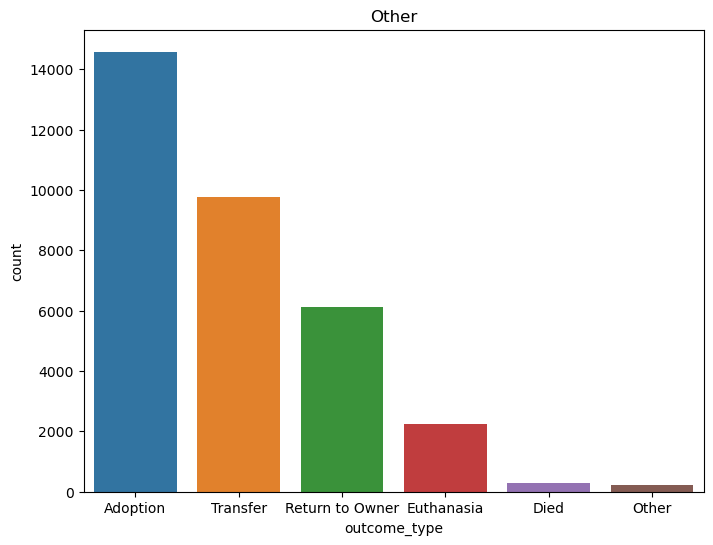

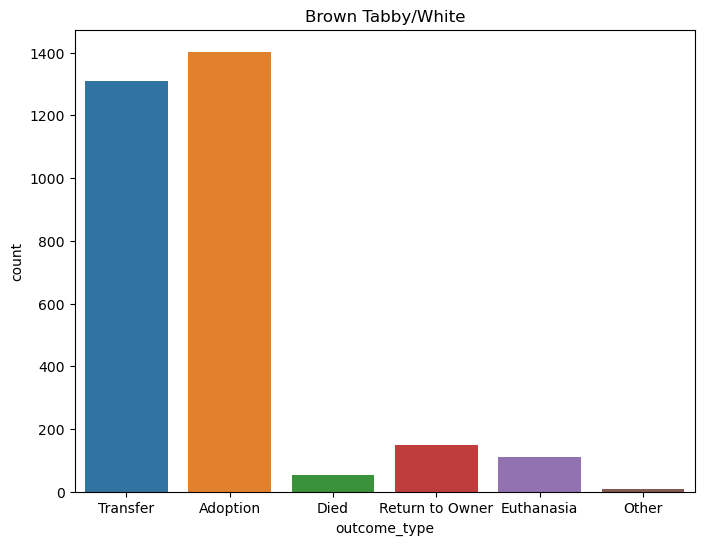

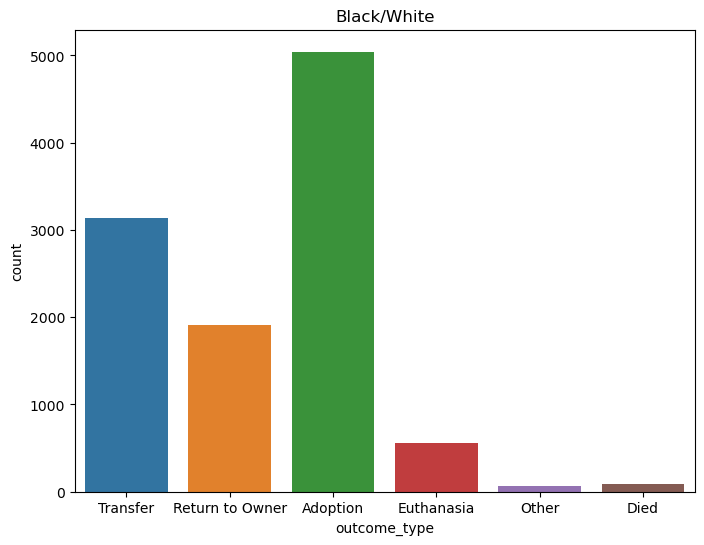

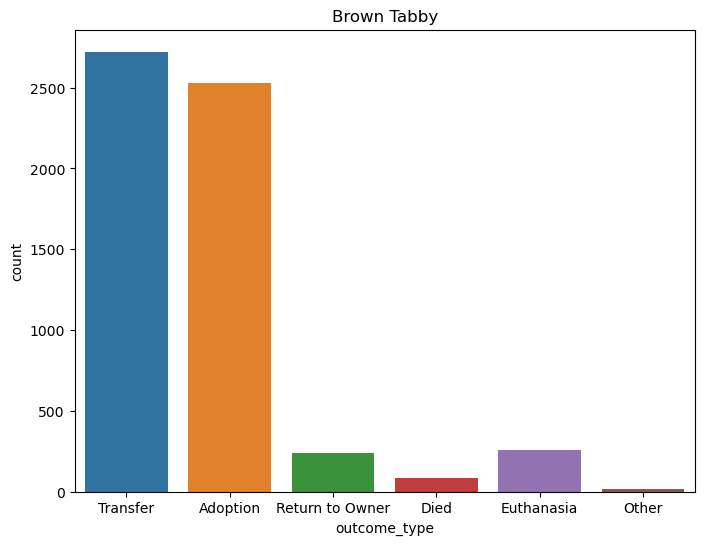

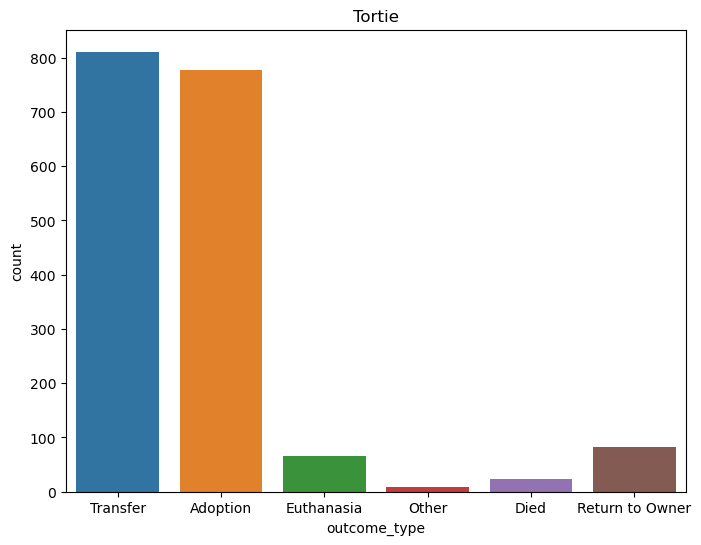

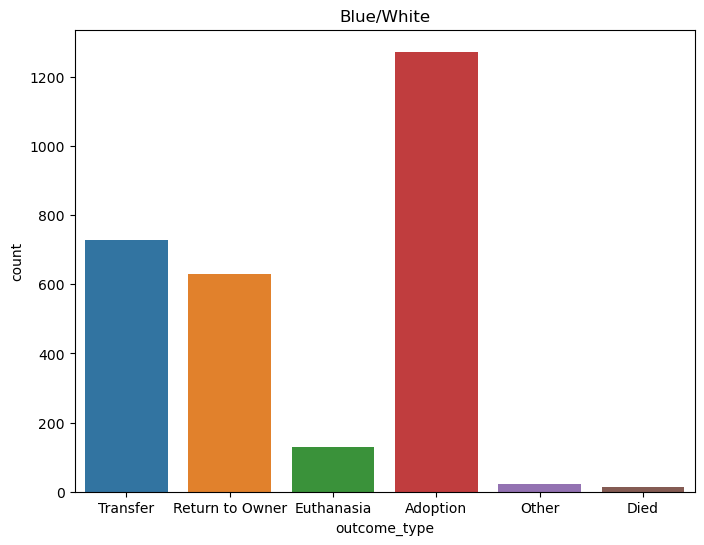

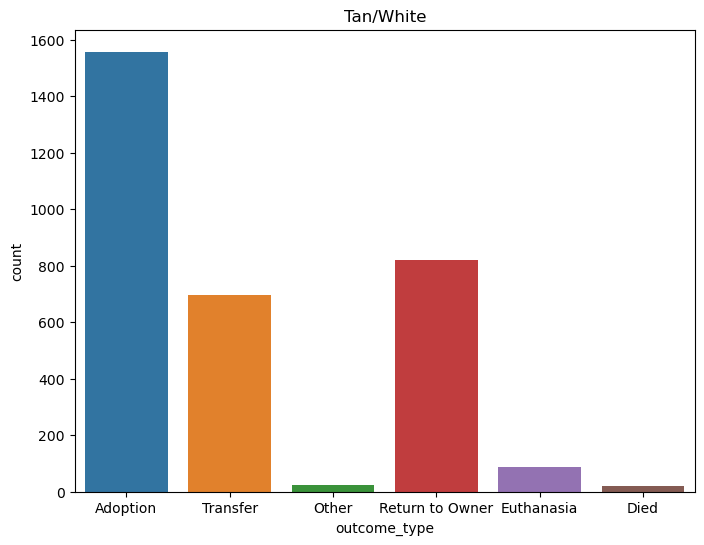

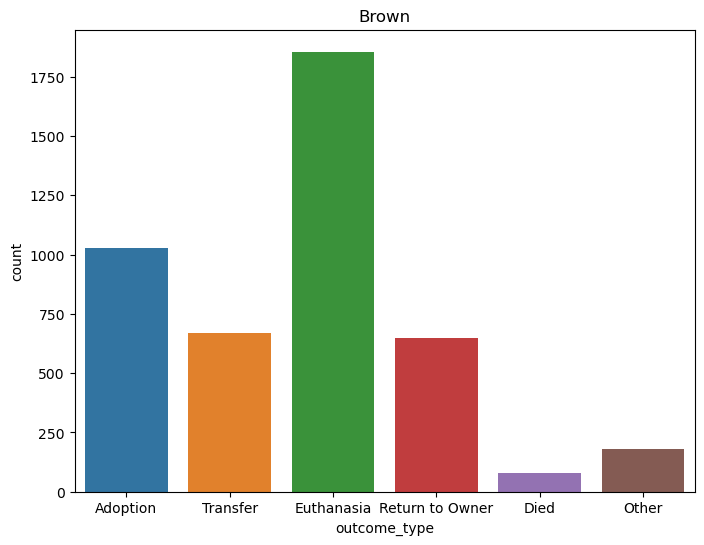

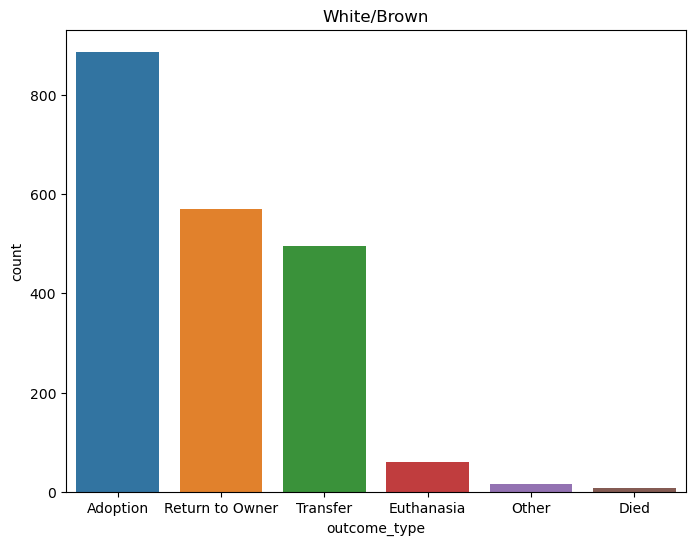

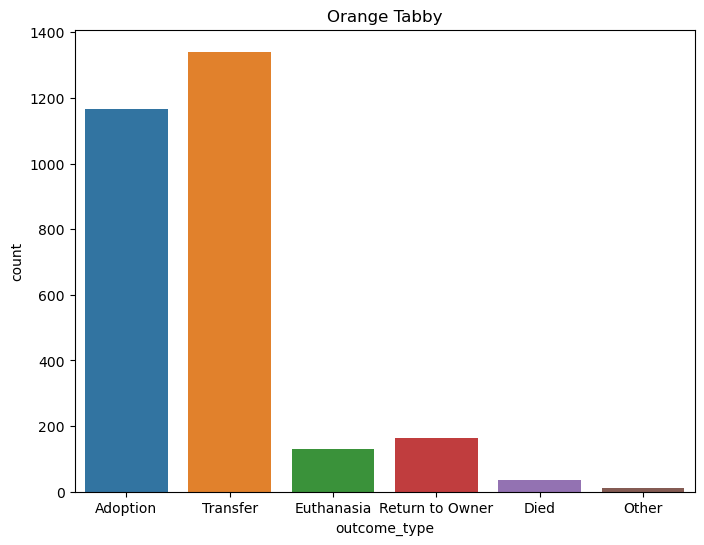

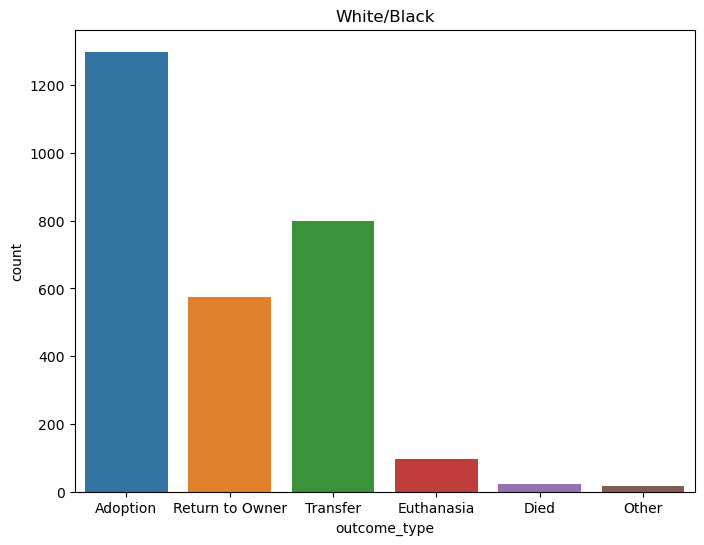

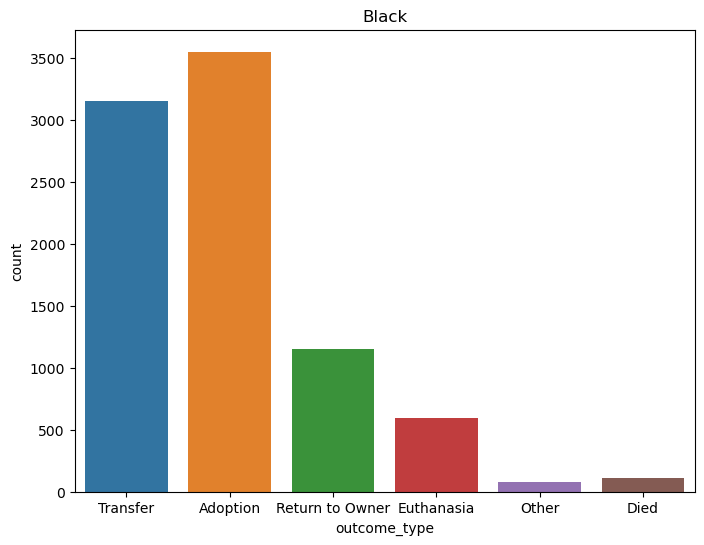

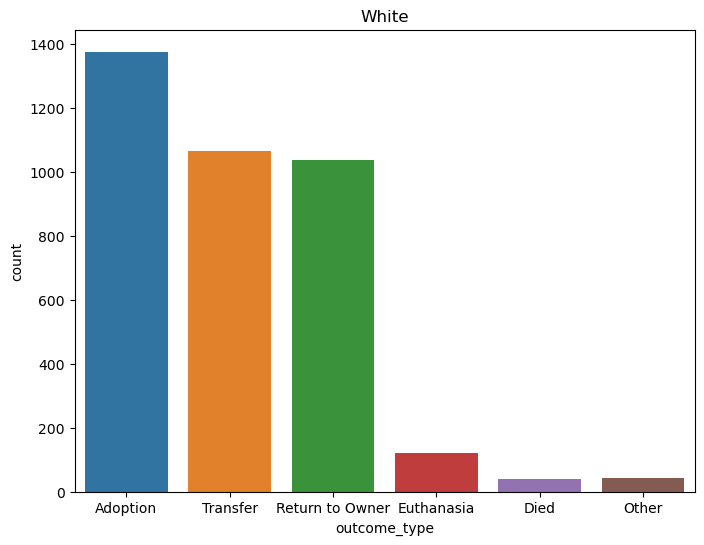

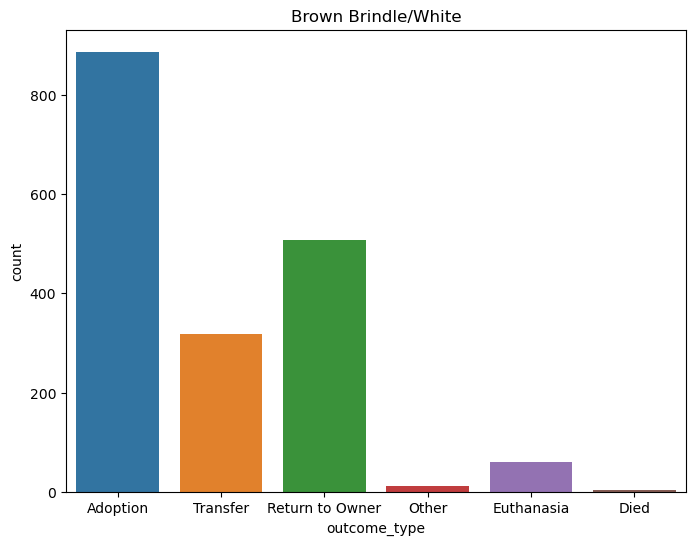

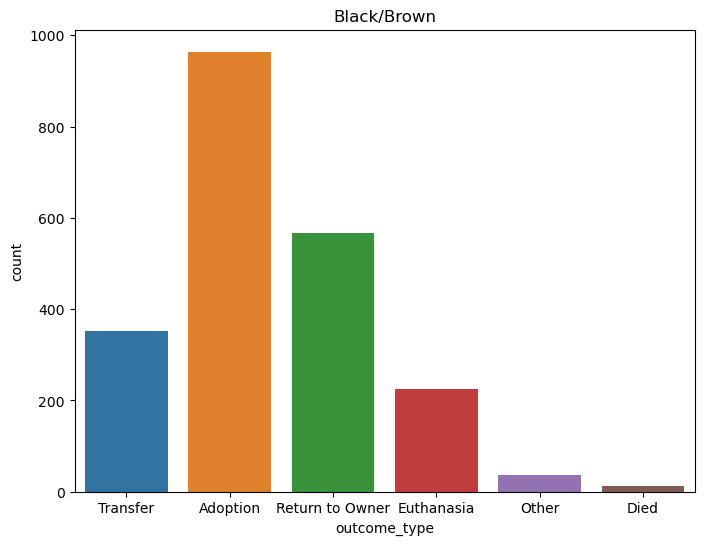

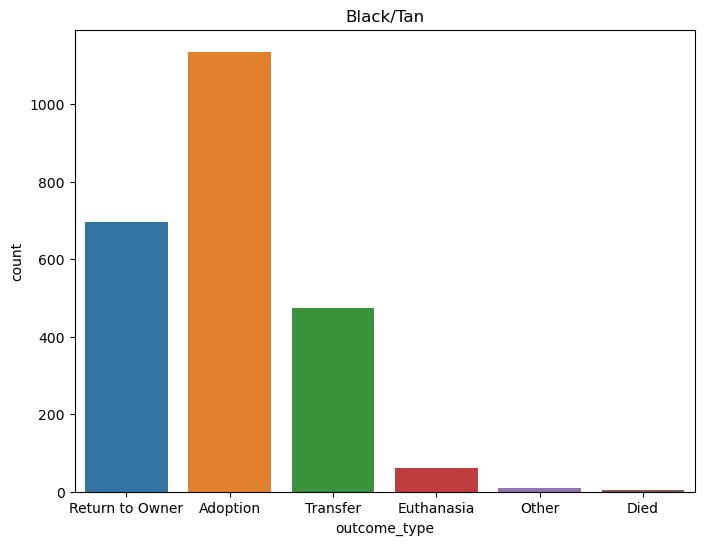

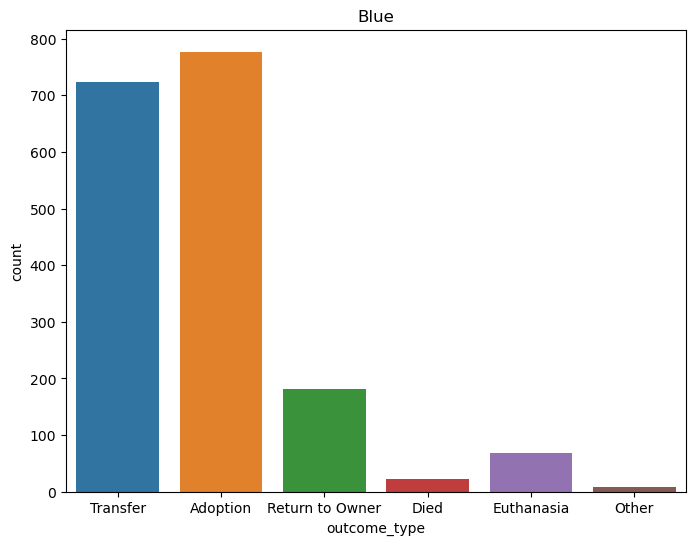

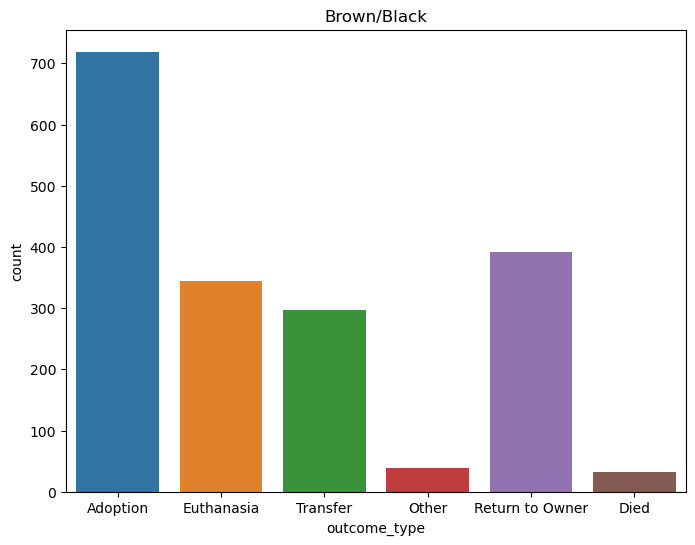

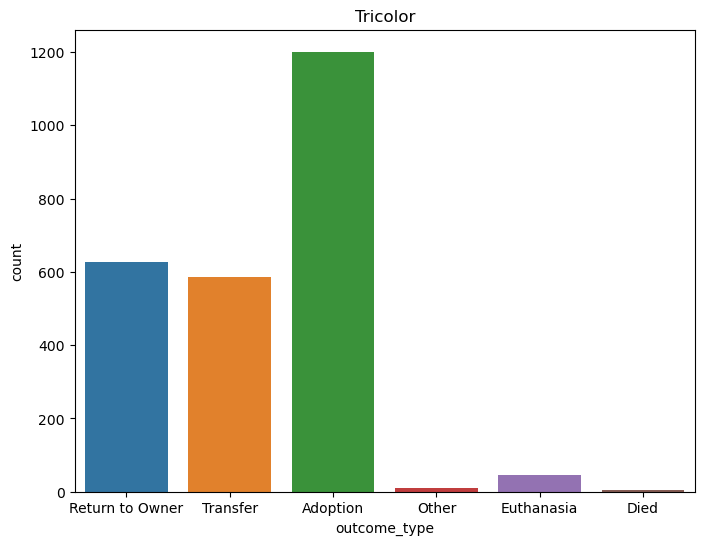

In [19]:
for color in a.color.unique():
    plt.figure(figsize=(8,6))
    sns.countplot(a[a.color == color], x='outcome_type')
    plt.title(color)

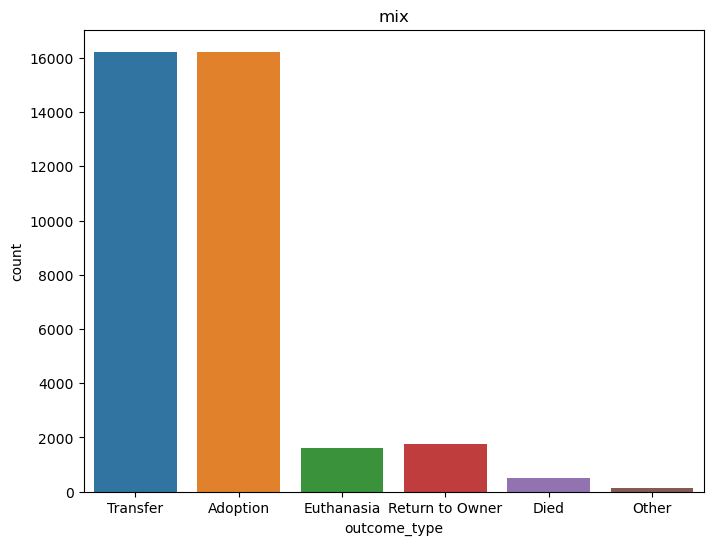

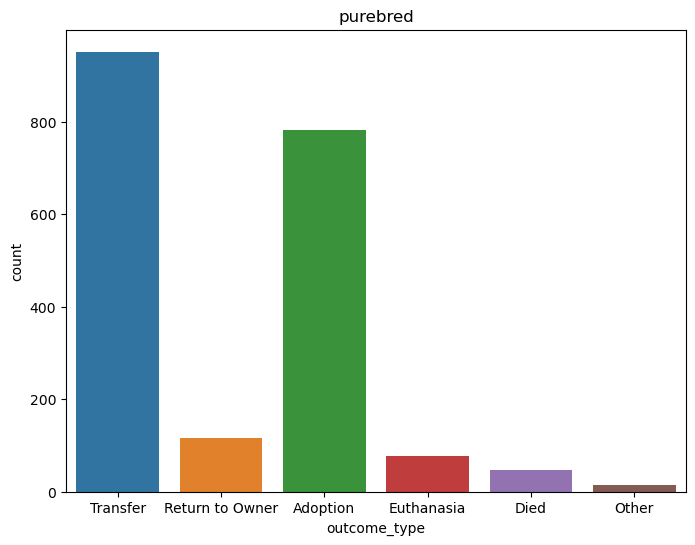

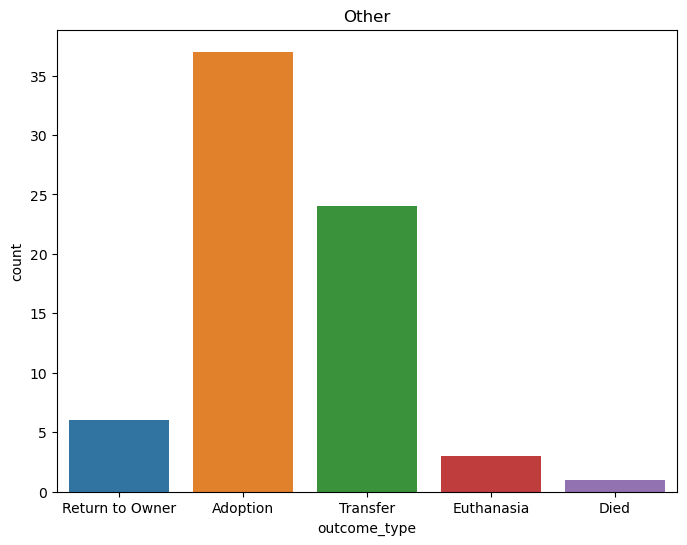

In [20]:
for breed in cat.breed2.unique():
    plt.figure(figsize=(8,6))
    sns.countplot(cat[cat.breed2 == breed], x='outcome_type')
    plt.title(breed)

In [24]:
other.outcome_type.value_counts()

Euthanasia         3853
Transfer            733
Adoption            338
Other               332
Died                168
Return to Owner      45
Name: outcome_type, dtype: int64